In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')
import dill

In [2]:
#dill.load_session('new.db')

#### Original Data Source : https://data.usaid.gov/HIV-AIDS/Supply-Chain-Shipment-Pricing-Data/a3rc-nmf6

#### This data set provides supply chain health commodity shipment and pricing data. Specifically, the data set identifies Antiretroviral (ARV) and HIV lab shipments to supported countries. In addition, the data set provides the commodity pricing and associated supply chain expenses necessary to move the commodities to countries for use. The dataset has similar fields to the Global Fund's Price, Quality and Reporting (PQR) data. PEPFAR and the Global Fund represent the two largest procurers of HIV health commodities. This dataset, when analyzed in conjunction with the PQR data, provides a more complete picture of global spending on specific health commodities. The data are particularly valuable for understanding ranges and trends in pricing as well as volumes delivered by country. The US Government believes this data will help stakeholders make better, data-driven decisions. Care should be taken to consider contextual factors when using the database. Conclusions related to costs associated with moving specific line items or products to specific countries and lead times by product/country will not be accurate.

## Reading the Data

In [3]:
# Reading the Data

pd.set_option('display.max_columns', 40)
data=pd.read_csv(r"E:\DATA SCIENCE\INTERNSHIP PROJECT\HEALTH-COMMODITY-SHIPMENT-PRICE-PREDICTION-main\SCMS_Delivery_History_Dataset.csv")
data.sample(8)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit_of_measure,Line Item Quantity,Line Item Value,Pack_Price,Unit_Price,Manufacturing Site,First Line Designation,Weight,Freight_Cost,Line Item Insurance (USD)
9808,86170,111-MZ-T30,FPQ-15195,SO-50121,DN-4153,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,10/17/14,N/A - From RDC,30-Jun-15,10-Apr-15,20-Apr-15,ARV,Adult,SCMS from RDC,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,Generic,200mg,Tablet,60,1960,4272.80,2.18,0.04,Hetero Unit III Hyderabad IN,Yes,9674,7921,5.03
7247,83057,900-UG-T30,FPQ-10048,SO-42600,DN-2746,Uganda,PMO - US,From RDC,N/A - From RDC,Air,6/6/12,N/A - From RDC,7-Aug-12,7-Aug-12,7-Aug-12,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30,23000,89930.00,3.91,0.13,"Strides, Bangalore, India.",Yes,1403,9800,126.08
8578,84684,110-ZM-T30,FPQ-7767,SO-40272,DN-2434,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,7/26/11,N/A - From RDC,28-Feb-12,28-Nov-11,28-Nov-11,ARV,Adult,SCMS from RDC,"Zidovudine 300mg, tablets, 60 Tabs",Zidovudine,Generic,300mg,Tablet,60,6376,44759.52,7.02,0.12,Hetero Unit III Hyderabad IN,Yes,639,889.94,73.85
5041,55160,116-ZA-T30,FPQ-3596,SCMS-50360,ASN-5451,South Africa,PMO - US,Direct Drop,DDP,Truck,5/7/09,9/22/09,29-Oct-09,29-Oct-09,29-Oct-09,ARV,Adult,S. BUYS WHOLESALER,"Zidovudine 300mg, tablets, 60 Tabs",Zidovudine,Generic,300mg,Tablet,60,1600,41783.61,26.11,0.44,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost,81.90
6051,72832,901-CM-T30,FPQ-12837,SCMS-204300,ASN-21709,Cameroon,PMO - US,Direct Drop,EXW,Air,8/19/13,8/23/13,7-Nov-13,30-Oct-13,29-Oct-13,ARV,Adult,Aurobindo Pharma Limited,Lamivudine/Tenofovir Disoproxil Fumarate 300/3...,Lamivudine/Tenofovir Disoproxil Fumarate,Generic,300/300mg,Tablet - FDC,30,20993,97617.45,4.65,0.16,"Aurobindo Unit VII, IN",Yes,2100,17568.6,120.75
93,1046,106-HT-T01,Pre-PQ Process,SCMS-40000,ASN-3675,Haiti,PMO - US,Direct Drop,CIP,Air,Pre-PQ Process,3/6/09,31-Mar-09,31-Mar-09,31-Mar-09,ARV,Pediatric,BRISTOL-MYERS SQUIBB,"Didanosine 50mg [Videx], chewable tablets, 60 ...",Didanosine,Videx,50mg,Chewable/dispersible tablet,60,80,760.00,9.50,0.16,"BMS Meymac, France",Yes,43,260,1.49
657,6595,110-ZM-T01,Pre-PQ Process,SCMS-38,ASN-25,Zambia,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,28-Aug-06,28-Aug-06,28-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1187.19,NaN
6252,76325,109-TZ-T30,FPQ-3782,SCMS-47730,ASN-4489,Tanzania,PMO - US,Direct Drop,CIP,Air,6/11/09,6/29/09,11-Aug-09,11-Aug-09,11-Aug-09,ARV,Adult,BRISTOL-MYERS SQUIBB,"Didanosine EC 250mg [Videx EC], delayed-releas...",Didanosine EC,Videx EC,250mg,Delayed-release capsules - blister,30,7000,128380.00,18.34,0.61,"BMS Meymac, France",No,See ASN-4489 (ID#:43989),See ASN-4489 (ID#:43989),251.62


In [4]:
#Shape of the data
data.shape

(10324, 33)

#### Data Description

##### 1. ID - identity number
##### 2. Project Code - Project code for the shipment 
##### 3. PQ # - Price quote (PQ) number
##### 4. PO / SO # - Purchase Order / Sales Order --- PO is a buyer's request to a seller (supplier) to order the goods/services
##### 5. ASN/DN # - Shipment number: Advanced Shipment Note (ASN) for Direct Drop deliveries, or Delivery Note (DN) for from RDC deliveries
##### 6. Country - Destination country , where shipment is to be delivered
##### 7. Managed By - SCMS managing office: either the Program Management Office (PMO) in the U.S. or the relevant SCMS field office
##### 8. Fulfill Via - Method through which the shipment was fulfilled: via Direct Drop from vendor or from stock available in the RDCs( retail distribution centers )
##### 9. Vendor INCO Term - The vendor INCO term (also known as International Commercial Terms) for Direct Drop deliveries---a set of 11 internationally recognized rules which define the responsibilities of sellers and buyers. Incoterms specifies who is responsible for paying for and managing the shipment, insurance, documentation, customs clearance, and other logistical activities.
##### 10. Shipment Mode - Method by which commodities are shipped
##### 11. PQ First Sent to Client Date - Date the PQ is first sent to the client
##### 12. PO Sent to Vendor Date - Date the PO is first sent to the vendor
##### 13. Scheduled Delivery Date - Date on which delivery to client was recorded in SCMS information systems
##### 14. Product Group - Product group for item, i.e. ARV(AIDS-related virus), HRDT
##### 15. Sub Classification - Identifies relevant product sub classifications, such as whether ARVs are pediatric or adult, whether a malaria product is an artemisinin-based combination therapy (ACT), etc.
##### 16. Vendor - Vendor name
##### 17. Item Description - Product name and formulation from Partnership for Supply Chain Management (PFSCM) Item Master
##### 18. Molecule/Test Type - Active drug(s) or test kit type
##### 19. Brand - Generic or branded name for the item
##### 20. Dosage - Item dosage and unit
##### 21. Dosage Form - Dosage form for the item (tablet, oral solution, injection, etc.).
##### 22. Unit of Measure (Per Pack) - Pack quantity (pills or test kits) used to compute unit price
##### 23. Line Item Quantity - Total quantity (packs) of commodity per line item
##### 24. Line Item Value - Total value of commodity per line item ,Line item value =  no. of items in line * price of a pack
##### 25. Pack Price - Cost per pack (i.e. month s supply of ARVs, pack of 60 test kits) ,pack price = unit measure per pack * unit price
##### 26. Unit Price - Cost per pill (for drugs) or per test (for test kits)
##### 27. Manufacturing Site - Identifies manufacturing site for the line item for direct drop and from RDC deliveries
##### 28. First Line Designation - Designates if the line in question shows the aggregated freight costs and weight associated with all items on the ASN DN
##### 29. Weight (Kilograms) - Weight for all lines on an ASN DN
##### 30. Freight Cost (USD) - Freight charges associated with all lines on the respective ASN DN
##### 31. Line Item Insurance (USD) - Line item cost of insurance, created by applying an annual flat rate ( ) to commodity cost

Target column =Shipment Price( total value of transporting the shipment to destination)=freight cost + line item value + Line item insurance
So we'll create a new feature for that later on 

In [5]:
# Checking and Validating Data Types
data.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit_of_measure                   int64
Line Item Quantity                int64


*we can see that columns - Scheduled Delivery Date ,Delivered to Client Date,Delivery Recorded Date ,PQ First Sent to Client Date,PO Sent to Vendor Date are dates,but are identified as 'object' type <br>
We can also see that columns - Weight (Kilograms)	, Freight Cost (USD) are actually numeric values , but are classified as 'object' type <br>
We need to change the data types of above identified columns*

In [6]:
# to Check for missing values
data.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit_of_measure                    0
Line Item Quantity                 0
Line Item Value                    0
Pack_Price                         0
U

In [7]:
data.describe()

,ID,Unit_of_measure,Line Item Quantity,Line Item Value,Pack_Price,Unit_Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


<AxesSubplot:>

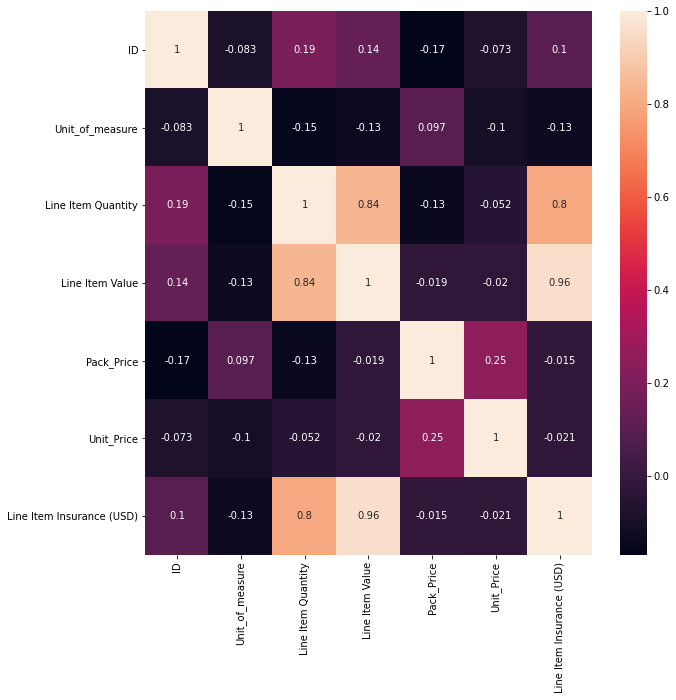

In [8]:
#to check correlation between columns
plt.figure(figsize=(10,10))
corr=data.corr()
top_features=corr.index
sns.heatmap(data[top_features].corr(),annot=True)

*As we can see line item value column is highly correlated with other columns*

## To perform EDA on data we need to do some operations

In [9]:
for i in ['Weight', 'Freight_Cost','PQ First Sent to Client Date','PO Sent to Vendor Date']:
    print(data[i].value_counts().head(),"\n\n")

Weight Captured Separately    1507
2                               29
6                               26
1                               23
5                               20
Name: Weight, dtype: int64 


Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
See DN-304 (ID#:10589)                  16
Name: Freight_Cost, dtype: int64 


Pre-PQ Process       2476
Date Not Captured     205
9/11/14               205
7/11/13               173
4/30/14               123
Name: PQ First Sent to Client Date, dtype: int64 


N/A - From RDC       5404
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
Name: PO Sent to Vendor Date, dtype: int64 




**For 'Weight', 'Freight_Cost'** <br>
*in above cell we observe that some of the weights were weighed separately and hence we don't have info about those weights , so we replace them with nan
moreover , in freight cost column , the cost was either not read from the ASN/DN , or Invoiced Separately etc.  ; hence it says to read from the tag itself manually ,
which is not feasible for every product , so we replace it with nan* <br>
*To capture the importance of the fact that it was measured separately ,Weight Captured Separately , freight included in commo..etc. , we'll create a new feature , else we might lose some important info*



In [10]:
data['Freight_cost_special']=0
for i in range(data.shape[0]):

    if data['Freight_Cost'].loc[i]  in ["Freight Included in Commodity Cost",'Invoiced Separately']:
        data['Freight_cost_special'].loc[i]=data['Freight_Cost'].loc[i]

    elif data['Freight_Cost'].loc[i].split(" ")[0]=="See":
        data['Freight_cost_special'].loc[i]="See ASN/DN Tag"

    else :
        data['Freight_cost_special'].loc[i]="Normal Measurement"


# For Shipment weight
data['Weight_special']=0
for i in range(data.shape[0]):

    if data['Weight'].loc[i]  in ["Weight Captured Separately"]:
        data['Weight_special'].loc[i]=data['Weight'].loc[i]

    elif data['Weight'].loc[i].split(" ")[0]=="See":
        data['Weight_special'].loc[i]="See ASN/DN Tag"

    else :
        data['Weight_special'].loc[i]="Normal Measurement"



<br>


**For 'PQ First Sent to Client Date','PO Sent to Vendor Date'** <br>
*We wil create separate feature to mark importance of data captured or not and in which form date is present*

In [11]:
# For PQ First Sent to Client Date

data['PQ_date']=0
for i in range(data.shape[0]):

    if data['PQ First Sent to Client Date'].loc[i]  in ['Pre-PQ Process','Date Not Captured']:
        data['PQ_date'].loc[i]=data['PQ First Sent to Client Date'].loc[i]
    else :
        data['PQ_date'].loc[i]="Date Captured"

# For PO Sent to Vendor Date

data['PO_date']=0
for i in range(data.shape[0]):

    if data['PO Sent to Vendor Date'].loc[i]  in ['N/A - From RDC' ,'Date Not Captured']:
        data['PO_date'].loc[i]=data['PO Sent to Vendor Date'].loc[i]

    else :
        data['PO_date'].loc[i]="Date Captured"

In [12]:
for i in ['PQ_date','PO_date']:
    print(data[i].value_counts().head(),"\n\n")

Date Captured        7643
Pre-PQ Process       2476
Date Not Captured     205
Name: PQ_date, dtype: int64 


N/A - From RDC       5404
Date Captured        4592
Date Not Captured     328
Name: PO_date, dtype: int64 




<br>

**For 'PQ_date','PO_date'** <br>
*approximately 30-50% data is missing and the dates are not sequential ,so we can't impute it in any way.So,after we have captured the importance of missing dates in previous cell .<br>
We will drop this related columns
if we had the all dates,then we could have found another feature as of now as per business scenario this columns are also not contributing for deciding shipment price*

In [13]:
# Converting data types to Datetime
for i in ['Scheduled Delivery Date', 'Delivered to Client Date','Delivery Recorded Date']:
    data[i]=pd.to_datetime(data[i], infer_datetime_format=True) #drops UTC

# Converting data types to Numeric

for i in ['Weight', 'Freight_Cost']:
    data[i]=pd.to_numeric(data[i],errors="coerce") # to replace non numeric values with Nan error set to errors='coerce'

In [14]:
# Rearranging data
# and excluding the columns - 'ID', 'Project Code' ,'PQ' , 'PO/SO' , 'ASD/DN' , 'PQ First Sent to Client Date', 'For PO Sent to Vendor Date'

data=data[['Country','Vendor','Manufacturing Site', 'Brand', 'Item Description','Product Group', 'Sub Classification',
       'Molecule/Test Type','Dosage Form','Dosage','Managed By', 'Vendor INCO Term','Fulfill Via', 'Shipment Mode',
       'Scheduled Delivery Date', 'Delivered to Client Date','Delivery Recorded Date',  'Unit_of_measure',
        'Line Item Quantity','Line Item Value', 'Pack_Price', 'Unit_Price','First Line Designation', 'Weight',
        'Weight_special', 'Freight_Cost', 'Freight_cost_special','Line Item Insurance (USD)']]
data.head()

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Unit_of_measure,Line Item Quantity,Line Item Value,Pack_Price,Unit_Price,First Line Designation,Weight,Weight_special,Freight_Cost,Freight_cost_special,Line Item Insurance (USD)
0,Côte d'Ivoire,RANBAXY Fine Chemicals LTD.,Ranbaxy Fine Chemicals LTD,Reveal,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...",HRDT,HIV test,"HIV, Reveal G3 Rapid HIV-1 Antibody Test",Test kit,NaN,PMO - US,EXW,Direct Drop,Air,2006-06-02,2006-06-02,2006-06-02,30,19,551.0,29.00,0.97,Yes,13.0,Normal Measurement,780.34,Normal Measurement,NaN
1,Vietnam,Aurobindo Pharma Limited,"Aurobindo Unit III, India",Generic,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",ARV,Pediatric,Nevirapine,Oral suspension,10mg/ml,PMO - US,EXW,Direct Drop,Air,2006-11-14,2006-11-14,2006-11-14,240,1000,6200.0,6.20,0.03,Yes,358.0,Normal Measurement,4521.50,Normal Measurement,NaN
2,Côte d'Ivoire,Abbott GmbH & Co. KG,ABBVIE GmbH & Co.KG Wiesbaden,Determine,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",HRDT,HIV test,"HIV 1/2, Determine Complete HIV Kit",Test kit,NaN,PMO - US,FCA,Direct Drop,Air,2006-08-27,2006-08-27,2006-08-27,100,500,40000.0,80.00,0.80,Yes,171.0,Normal Measurement,1653.78,Normal Measurement,NaN
3,Vietnam,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Ranbaxy, Paonta Shahib, India",Generic,"Lamivudine 150mg, tablets, 60 Tabs",ARV,Adult,Lamivudine,Tablet,150mg,PMO - US,EXW,Direct Drop,Air,2006-09-01,2006-09-01,2006-09-01,60,31920,127360.8,3.99,0.07,Yes,1855.0,Normal Measurement,16007.06,Normal Measurement,NaN
4,Vietnam,Aurobindo Pharma Limited,"Aurobindo Unit III, India",Generic,"Stavudine 30mg, capsules, 60 Caps",ARV,Adult,Stavudine,Capsule,30mg,PMO - US,EXW,Direct Drop,Air,2006-08-11,2006-08-11,2006-08-11,60,38000,121600.0,3.20,0.05,Yes,7590.0,Normal Measurement,45450.08,Normal Measurement,NaN


In [15]:
# Now , all dtypes are correct
data.dtypes

Country                              object
Vendor                               object
Manufacturing Site                   object
Brand                                object
Item Description                     object
Product Group                        object
Sub Classification                   object
Molecule/Test Type                   object
Dosage Form                          object
Dosage                               object
Managed By                           object
Vendor INCO Term                     object
Fulfill Via                          object
Shipment Mode                        object
Scheduled Delivery Date      datetime64[ns]
Delivered to Client Date     datetime64[ns]
Delivery Recorded Date       datetime64[ns]
Unit_of_measure                       int64
Line Item Quantity                    int64
Line Item Value                     float64
Pack_Price                          float64
Unit_Price                          float64
First Line Designation          

## To perform EDA,We will create index as per the datatypes

In [16]:
# getting index of object type column names
categ_index=data.dtypes[data.dtypes=='object'].index

# getting index of numeric type columns
floats=data.dtypes[data.dtypes=='float64'].index
ints=data.dtypes[data.dtypes=='int64'].index

num_index=floats.append(ints)

# getting index of datetime columns
date_index=data.dtypes[data.dtypes=='datetime64[ns]'].index


In [17]:
num_index

Index(['Line Item Value', 'Pack_Price', 'Unit_Price', 'Weight', 'Freight_Cost',
       'Line Item Insurance (USD)', 'Unit_of_measure', 'Line Item Quantity'],
      dtype='object')

In [18]:
categ_index

Index(['Country', 'Vendor', 'Manufacturing Site', 'Brand', 'Item Description',
       'Product Group', 'Sub Classification', 'Molecule/Test Type',
       'Dosage Form', 'Dosage', 'Managed By', 'Vendor INCO Term',
       'Fulfill Via', 'Shipment Mode', 'First Line Designation',
       'Weight_special', 'Freight_cost_special'],
      dtype='object')

In [19]:
# Statistical properties of numerical columns
data[num_index].describe()

,Line Item Value,Pack_Price,Unit_Price,Weight,Freight_Cost,Line Item Insurance (USD),Unit_of_measure,Line Item Quantity
count,1.032400e+04,10324.000000,10324.000000,6372.000000,6198.000000,10037.000000,10324.000000,10324.000000
mean,1.576506e+05,21.910241,0.611701,3424.441306,11103.234819,240.117626,77.990895,18332.534870
std,3.452921e+05,45.609223,3.275808,13526.968270,15813.026692,500.190568,76.579764,40035.302961
min,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,1.000000
25%,4.314593e+03,4.120000,0.080000,206.750000,2131.120000,6.510000,30.000000,408.000000
50%,3.047147e+04,9.300000,0.160000,1047.000000,5869.655000,47.040000,60.000000,3000.000000
75%,1.664471e+05,23.592500,0.470000,3334.000000,14406.570000,252.400000,90.000000,17039.750000
max,5.951990e+06,1345.640000,238.650000,857354.000000,289653.200000,7708.440000,1000.000000,619999.000000


In [20]:
# Statistical properties of categorical columns
data[categ_index].describe()

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,First Line Designation,Weight_special,Freight_cost_special
count,10324,10324,10324,10324,10324,10324,10324,10324,10324,8588,10324,10324,10324,9964,10324,10324,10324
unique,43,73,88,48,184,5,6,86,17,54,4,8,2,4,2,3,4
top,South Africa,SCMS from RDC,"Aurobindo Unit III, India",Generic,"Efavirenz 600mg, tablets, 30 Tabs",ARV,Adult,Efavirenz,Tablet,300mg,PMO - US,N/A - From RDC,From RDC,Air,Yes,Normal Measurement,Normal Measurement
freq,1406,5404,3172,7285,755,8550,6595,1125,3532,990,10265,5404,5404,6113,7030,6372,6198


## EDA 

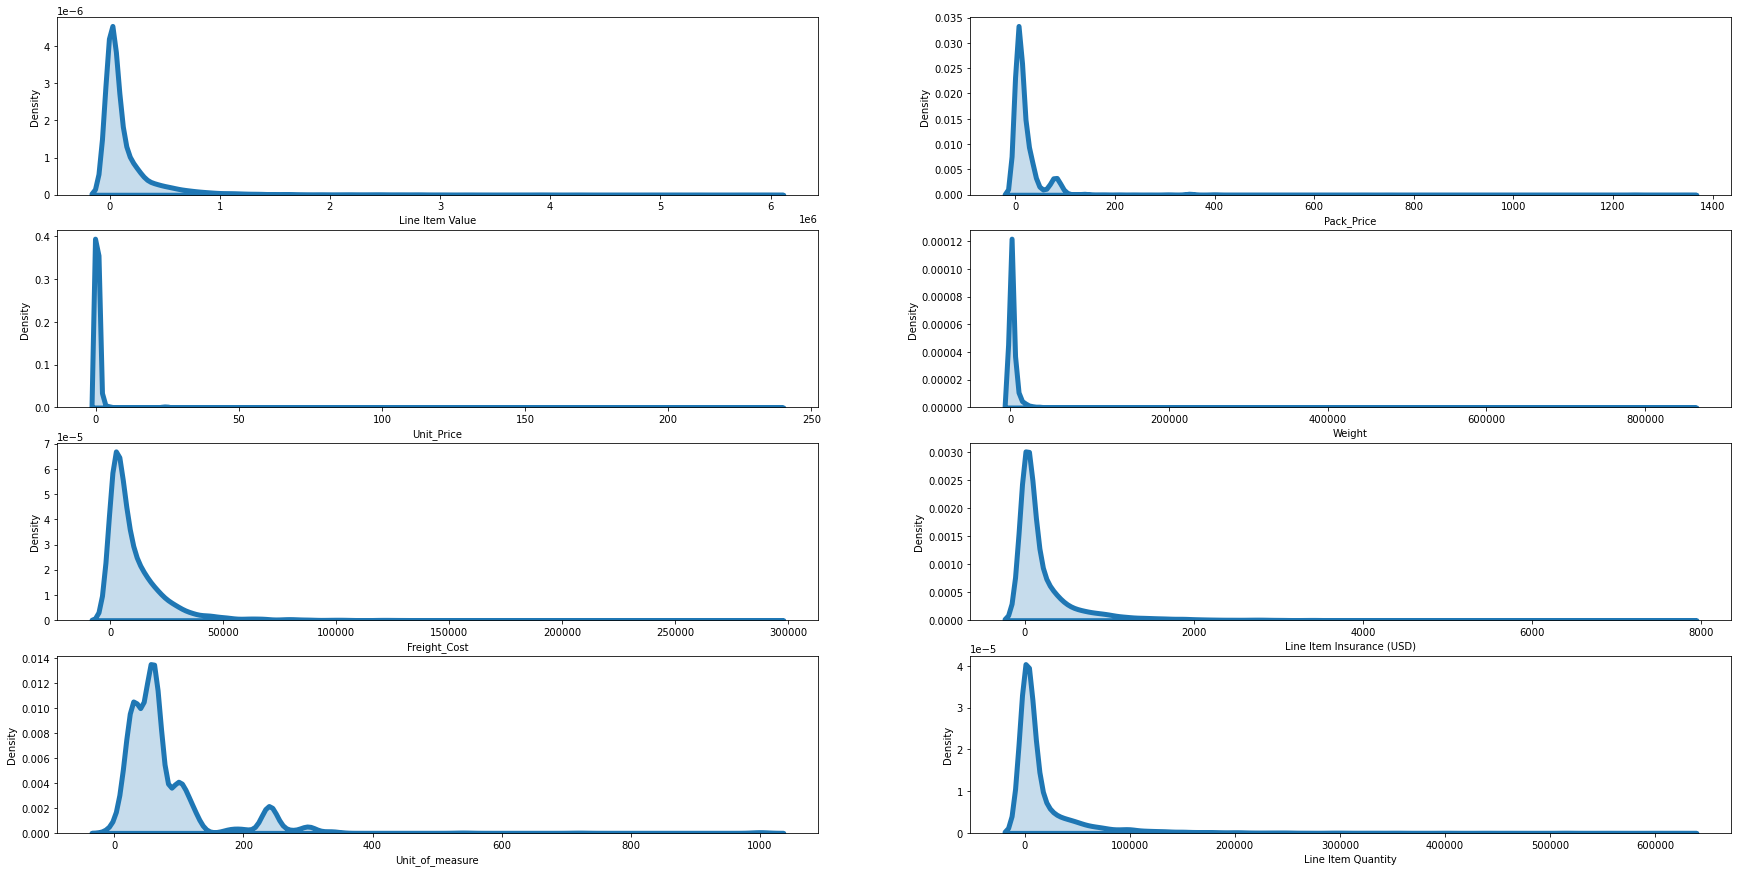

In [21]:
# Checking Distribution of data in columns

fig,ax=plt.subplots(4,2,figsize=(30,15))

row,column=0,0
for col in num_index:
    sns.kdeplot(data[col],ax=ax[row,column],shade=True,linewidth=5,)
    column+=1
    if column==2:
        column=0
        row+=1
    

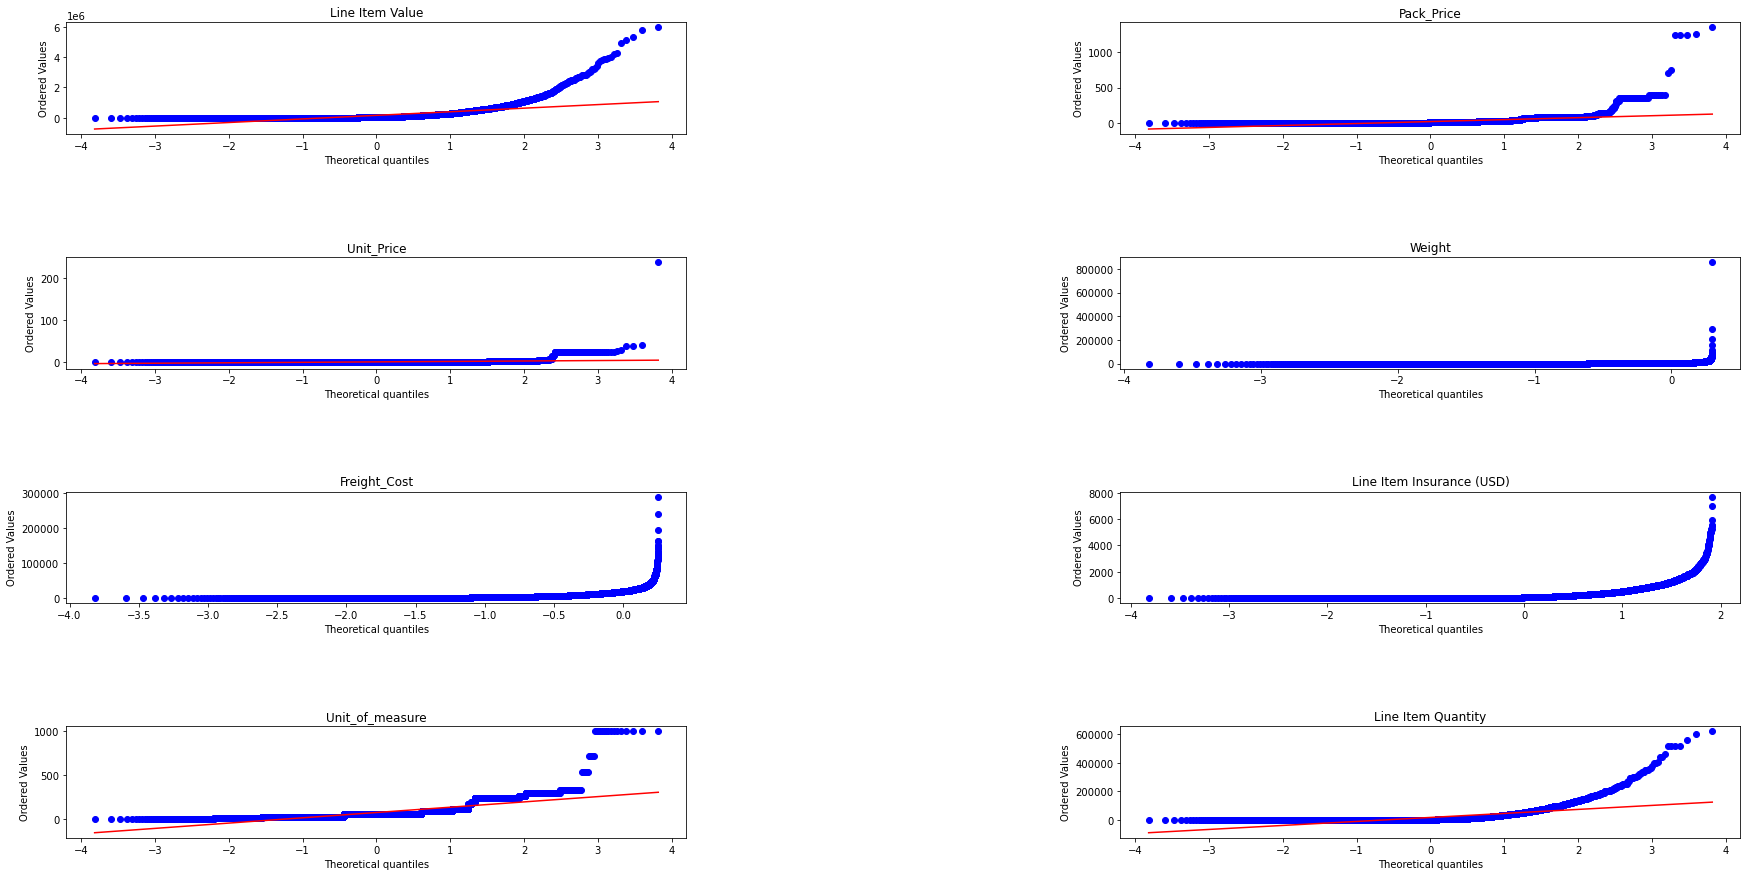

In [22]:
# Checking Normality of distribution using Normal Probability Plot

from scipy import stats

fig,ax=plt.subplots(4,2,figsize=(30,15))
plt.subplots_adjust( 
                    wspace=0.7, 
                    hspace=1.1)

a,b=0,0
for col in num_index:
    stats.probplot(data[col],plot=ax[a,b])
    ax[a,b].set_title(col)
    b+=1
    if b==2:
        b=0
        a+=1

*It is observed that most of the features are Right skewed (might have outliers in the right tail)*

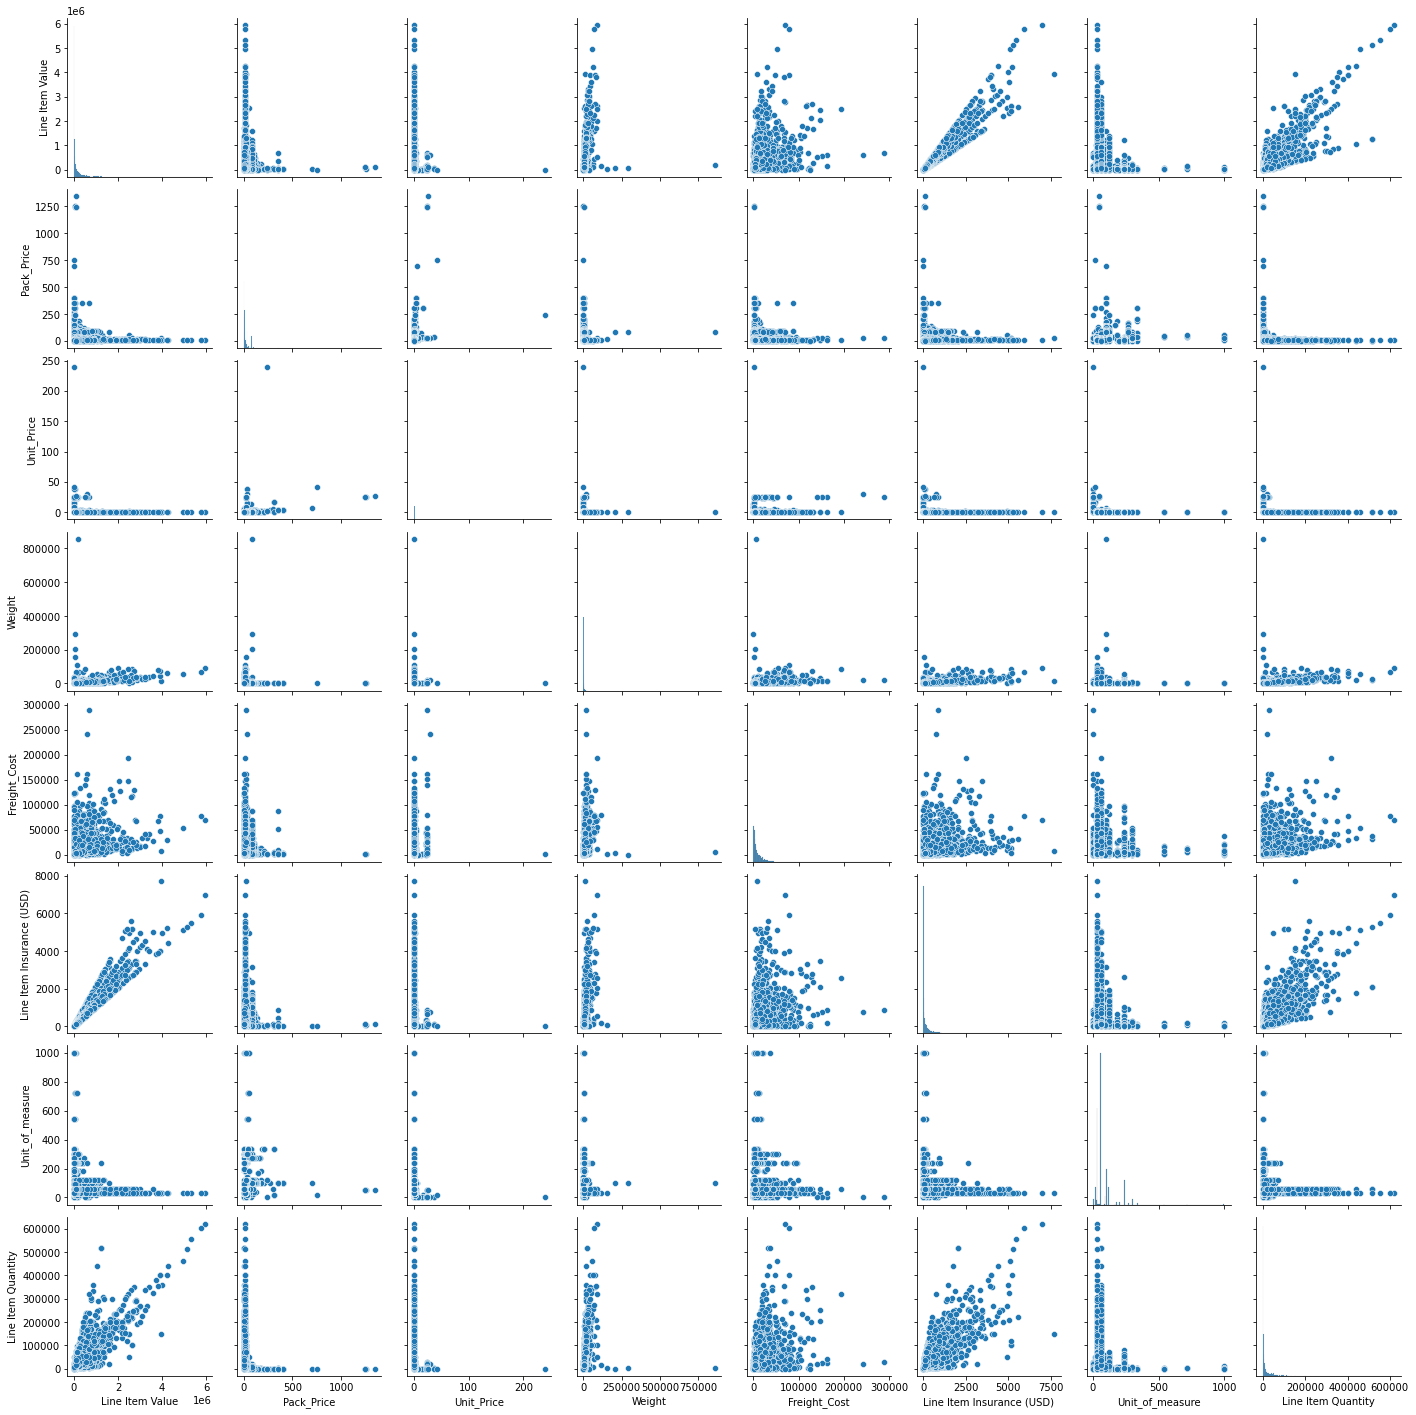

In [23]:
# Visualizing Correlation b/w features,using Scatter Plots
sns.pairplot(data[num_index])

Text(0, 0.5, 'Shipment Value')

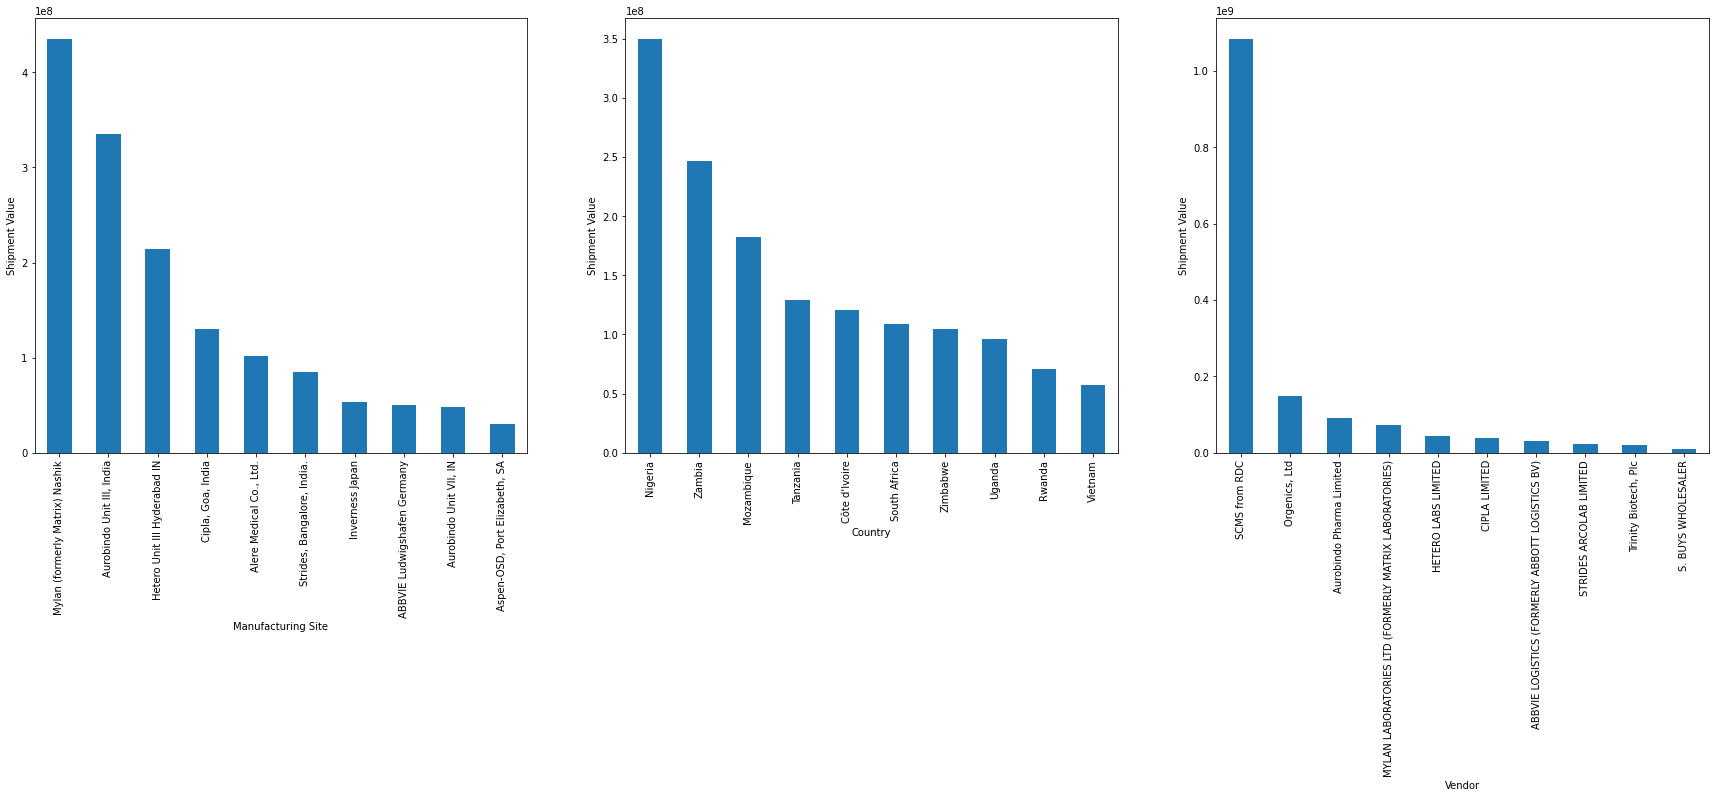

In [24]:
fig,ax=plt.subplots(1,3,figsize=(30,8))

# Top 10 Manufacturing sites by Total Price/Value of Packs produced 
data.groupby(['Manufacturing Site'])['Line Item Value'].sum().nlargest(10).plot(kind='bar',ax=ax[0])
ax[0].set_ylabel('Shipment Value')

# Top 10 Countries by Total Price/Value of Packs produced 
data.groupby(['Country'])['Line Item Value'].sum().nlargest(10).plot(kind='bar',ax=ax[1])
ax[1].set_ylabel('Shipment Value')

# Top 10 Vendors sites by Total Price/Value of Packs produced 
data.groupby(['Vendor'])['Line Item Value'].sum().nlargest(10).plot(kind='bar',ax=ax[2])
ax[2].set_ylabel('Shipment Value')

Text(0, 0.5, 'Shipment Value')

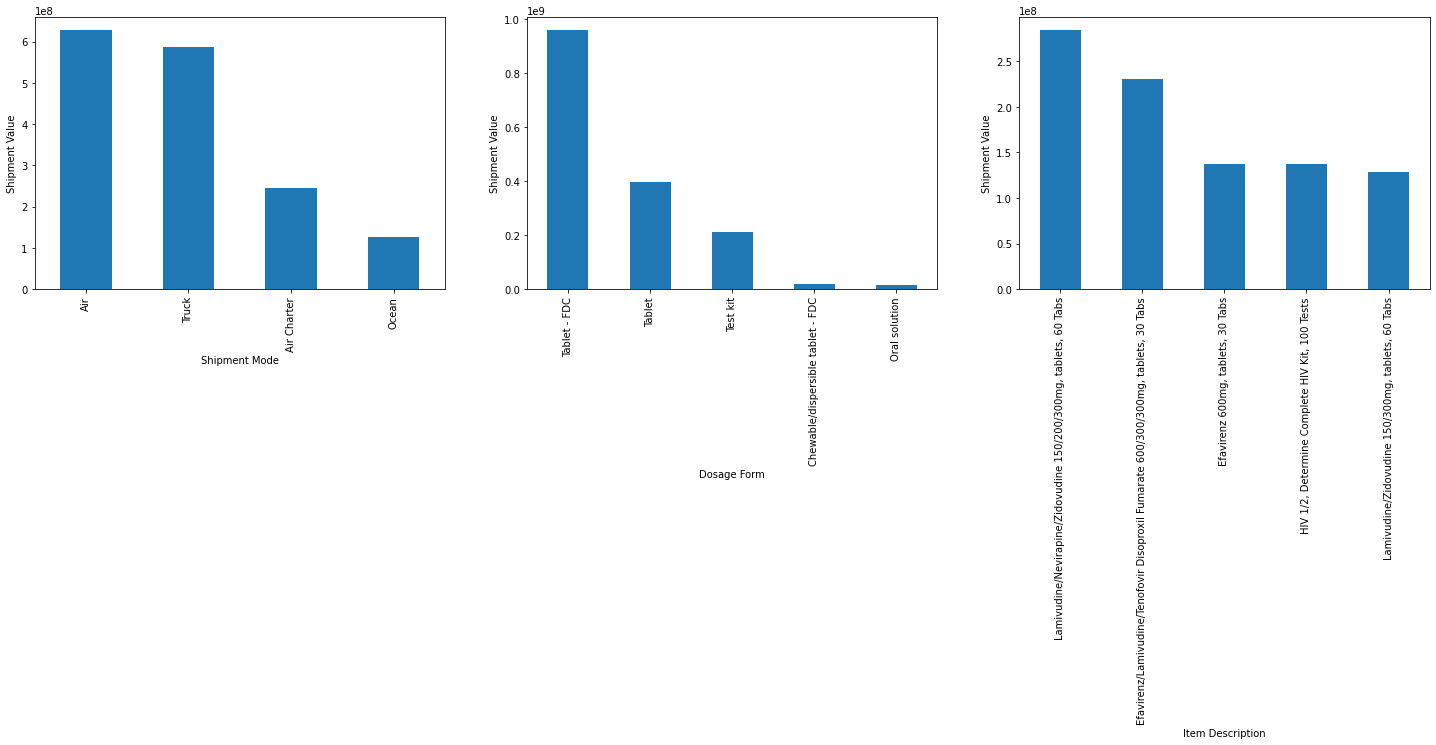

In [25]:
fig,ax=plt.subplots(1,3,figsize=(25,5))
data.groupby(['Shipment Mode'])['Line Item Value'].sum().nlargest(5).plot(kind='bar',ax=ax[0])
ax[0].set_ylabel('Shipment Value')
data.groupby(['Dosage Form'])['Line Item Value'].sum().nlargest(5).plot(kind='bar',ax=ax[1])
ax[1].set_ylabel('Shipment Value')
data.groupby(['Item Description'])['Line Item Value'].sum().nlargest(5).plot(kind='bar',ax=ax[2])
plt.xticks(rotation=90)
ax[2].set_ylabel('Shipment Value')

(array([0, 1, 2]),
 [Text(0, 0, 'Normal Measurement'),
  Text(1, 0, 'See ASN/DN Tag'),
  Text(2, 0, 'Weight Captured Separately')])

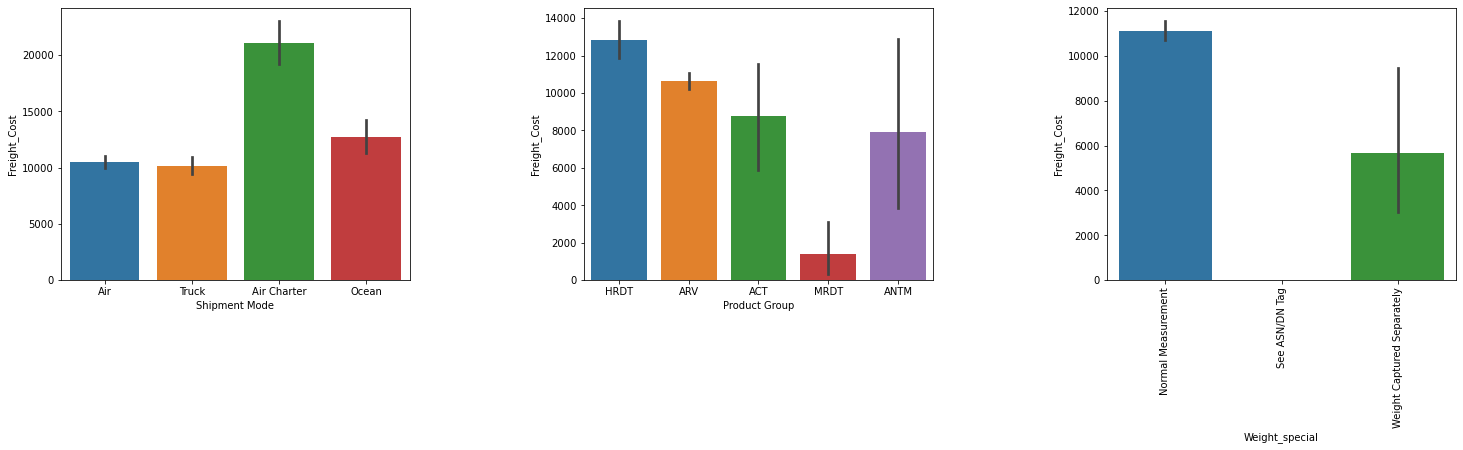

In [26]:
fig,ax=plt.subplots(1,3,figsize=(25,5))
plt.subplots_adjust( wspace=0.5)

sns.barplot('Shipment Mode','Freight_Cost',data=data,ax=ax[0])
sns.barplot('Product Group','Freight_Cost',data=data,ax=ax[1])
sns.barplot('Weight_special','Freight_Cost',data=data,ax=ax[2])
plt.xticks(rotation=90)


# FEATURE ENGINEERING

## Null Value Imputation

In [27]:
# Getting Columns with null values
null_val_cols=(data.isnull().sum()[data.isnull().sum()>0]).index
null_val_cols

Index(['Dosage', 'Shipment Mode', 'Weight', 'Freight_Cost',
       'Line Item Insurance (USD)'],
      dtype='object')

In [28]:
# Random Sample Imputation for Categorical Columns
for col in ['Dosage', 'Shipment Mode']:
    rand_samples=data[col].dropna().sample(data[col].isnull().sum())
    rand_samples.index=data[data[col].isnull()].index
    data.loc[data[col].isnull(),col]=rand_samples

In [29]:
# KNN Imputation for numerical columns
from sklearn.impute import KNNImputer

for col in ['Weight', 'Freight_Cost','Line Item Insurance (USD)'] :
        imputer=KNNImputer(n_neighbors=10)
        data[col]=imputer.fit_transform(data[[col]])

In [30]:
data.isnull().sum()

Country                      0
Vendor                       0
Manufacturing Site           0
Brand                        0
Item Description             0
Product Group                0
Sub Classification           0
Molecule/Test Type           0
Dosage Form                  0
Dosage                       0
Managed By                   0
Vendor INCO Term             0
Fulfill Via                  0
Shipment Mode                0
Scheduled Delivery Date      0
Delivered to Client Date     0
Delivery Recorded Date       0
Unit_of_measure              0
Line Item Quantity           0
Line Item Value              0
Pack_Price                   0
Unit_Price                   0
First Line Designation       0
Weight                       0
Weight_special               0
Freight_Cost                 0
Freight_cost_special         0
Line Item Insurance (USD)    0
dtype: int64

## Calculating Target Column After NULL Value Imputation

In [31]:
data["Shipment_Price"] =data['Freight_Cost']+data['Line Item Value']+data['Line Item Insurance (USD)']
data["Shipment_Price"].round(decimals=2)

0           1571.46
1          10961.62
2          41893.90
3         143607.98
4         167290.20
            ...    
10319     611464.62
10320     148654.38
10321    5156502.01
10322     125109.06
10323      84100.66
Name: Shipment_Price, Length: 10324, dtype: float64

In [32]:
# value of goods = ( Line Item Value + Line Item insurance )/Line Item Quantity assigns higher value to sales driving shipments,rather than volume driving shipments
data["item_value"]=(data['Line Item Value']+data['Line Item Insurance (USD)'])/data['Line Item Quantity']

In [33]:
# getting index of numeric type columns
floats=data.dtypes[data.dtypes=='float64'].index
ints=data.dtypes[data.dtypes=='int64'].index
num_index=floats.append(ints)
num_index

Index(['Line Item Value', 'Pack_Price', 'Unit_Price', 'Weight', 'Freight_Cost',
       'Line Item Insurance (USD)', 'Shipment_Price', 'item_value',
       'Unit_of_measure', 'Line Item Quantity'],
      dtype='object')

In [34]:
num_index=num_index.drop('Shipment_Price')

## Encoding of Categorical Features

**Columns for frequency encode** - *'Country', 'Vendor', 'Manufacturing Site', 'Brand', 'Item Description','Product Group', 'Sub Classification', 'Molecule/Test Type','Dosage Form',
                       'Dosage', 'Managed By', 'Vendor INCO Term', 'Shipment Mode', 'Weight_special', 'Freight_cost_special'*

**Columns for one hot encoding** -- *'Fulfill Via','First Line Designation'* <br>
**Columns for ordinal encoding** --- *can be done in inco terms , shipment mode , -- domain knowledge is needed , moreover wedon't know personal preferences of the distributor , which might benefit him*

**Observed that in all the categorical columns , there are a large number of unique values
We would not like to include all the unique values rather , we encode the top 10 categories and the remaining are classified as Other**

In [35]:
for col in categ_index:
    for i in range( data.shape[0]):
        if data[col].loc[i] in list(data[col].value_counts().head(10).to_dict().keys()):
            continue
        else :
            data[col].loc[i]="Other"


In [36]:
for cols in categ_index:
    print(f"\n {data[cols].value_counts().head(10)}")
    


 Other            2512
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Name: Country, dtype: int64

 SCMS from RDC                                            5404
Other                                                    1141
Orgenics, Ltd                                             754
S. BUYS WHOLESALER                                        715
Aurobindo Pharma Limited                                  668
Trinity Biotech, Plc                                      356
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)           347
PHARMACY DIRECT                                           326
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)     317
HETERO LABS LIMITED                                       277
Name: Vendor, dtype: int64

 Aurobindo Unit III, India         3172
Other                             2052
Mylan (formerly Matri

While Frequency encoding , manually give less frequency for "Other" category as , there are a large no. of insignificant categories which aggregated to a large no.<br>
We do this so that the insignificant categories don't get unnecessarily higher weightage , while training

**Columns to do manual encoding changes**- Country , Vendor , Manufacturing site ,Brand , Item description , Molecule/Test type,Dosage

**Frequency encode -** 'Product Group', 'Sub Classification','Dosage Form','Managed By', 'Vendor INCO Term', 'Shipment Mode', 'Weight_special', 'Freight_cost_special'



In [37]:
country_map=data.Country.value_counts().to_dict()
country_map["Other"]=min(country_map.values())-75
data.Country=data.Country.map((country_map))

In [38]:
vendor_map=data.Vendor.value_counts().to_dict()
vendor_map["Other"]=2
data.Vendor=data.Vendor.map(vendor_map)


In [39]:
manuf_site_map=data['Manufacturing Site'].value_counts().to_dict()
manuf_site_map["Other"]=2
data['Manufacturing Site']=data['Manufacturing Site'].map(manuf_site_map)


In [40]:
brand_map=data.Brand.value_counts().to_dict()
brand_map["Other"]=5
data.Brand=data.Brand.map(brand_map)

In [41]:
item_map=data['Item Description'].value_counts().to_dict()
item_map["Other"]=1
data['Item Description']=data['Item Description'].map(item_map)

In [42]:
test_type_map=data['Molecule/Test Type'].value_counts().to_dict()
test_type_map["Other"]=5
data['Molecule/Test Type']=data['Molecule/Test Type'].map(test_type_map)

In [43]:
dosage_map=data.Dosage.value_counts().to_dict()
dosage_map["Other"]=2
data.Dosage=data.Dosage.map(dosage_map)

In [44]:
prod_group_map=data['Product Group'].value_counts().to_dict()
data['Product Group']=data['Product Group'].map(prod_group_map)

In [45]:
sub_class_map=data['Sub Classification'].value_counts().to_dict()
data['Sub Classification']=data['Sub Classification'].map(sub_class_map)

In [46]:
dosage_form_map=data['Dosage Form'].value_counts().to_dict()
data['Dosage Form']=data['Dosage Form'].map(dosage_form_map)

In [47]:
managed_by_map=data['Managed By'].value_counts().to_dict()
data['Managed By']=data['Managed By'].map(managed_by_map)

In [48]:
inco_term_map=data['Vendor INCO Term'].value_counts().to_dict()
data['Vendor INCO Term']=data['Vendor INCO Term'].map(inco_term_map)

In [49]:
shipment_mode_map=data['Shipment Mode'].value_counts().to_dict()
data['Shipment Mode']=data['Shipment Mode'].map(shipment_mode_map)

In [50]:
wt_spcl_map=data['Weight_special'].value_counts().to_dict()
data['Weight_special']=data['Weight_special'].map(wt_spcl_map)

In [51]:
freight_spcl_map=data['Freight_cost_special'].value_counts().to_dict()
data['Freight_cost_special']=data['Freight_cost_special'].map(freight_spcl_map)

**one hot encoding--**'Fulfill Via','First Line Designation'

In [52]:
data['Fulfill Via']=pd.get_dummies(data['Fulfill Via'],drop_first=True,dtype='float64')
#---From RDC-1 ; Direct Drop-0

In [53]:
data['First Line Designation']=pd.get_dummies(data['First Line Designation'],drop_first=True,dtype='float64') 
#---Yes-1 ; No-0

In [54]:
data

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Unit_of_measure,Line Item Quantity,Line Item Value,Pack_Price,Unit_Price,First Line Designation,Weight,Weight_special,Freight_Cost,Freight_cost_special,Line Item Insurance (USD),Shipment_Price,item_value
0,1083,2,2,5,1,1728,1567,5,1575,2,10265,2778,0.0,6327,2006-06-02,2006-06-02,2006-06-02,30,19,551.00,29.00,0.97,1.0,13.000000,6372,780.340000,6198,240.117626,1.571458e+03,41.637770
1,688,668,3172,7285,1,8550,1955,877,214,672,10265,2778,0.0,6327,2006-11-14,2006-11-14,2006-11-14,240,1000,6200.00,6.20,0.03,1.0,358.000000,6372,4521.500000,6198,240.117626,1.096162e+04,6.440118
2,1083,2,2,799,577,1728,1567,577,1575,1108,10265,397,0.0,6327,2006-08-27,2006-08-27,2006-08-27,100,500,40000.00,80.00,0.80,1.0,171.000000,6372,1653.780000,6198,240.117626,4.189390e+04,80.480235
3,688,2,2,7285,378,8550,6595,592,3532,526,10265,2778,0.0,6327,2006-09-01,2006-09-01,2006-09-01,60,31920,127360.80,3.99,0.07,1.0,1855.000000,6372,16007.060000,6198,240.117626,1.436080e+05,3.997522
4,688,668,3172,7285,1,8550,6595,5,729,2,10265,2778,0.0,6327,2006-08-11,2006-08-11,2006-08-11,60,38000,121600.00,3.20,0.05,1.0,7590.000000,6372,45450.080000,6198,240.117626,1.672902e+05,3.206319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,538,5404,2,7285,1,8550,1955,707,239,2,10265,5404,1.0,2936,2015-07-31,2015-07-15,2015-07-20,60,166571,599655.60,3.60,0.06,0.0,3424.441306,2445,11103.234819,2445,705.790000,6.114646e+05,3.604237
10320,1083,5404,869,7285,597,8550,6595,689,2749,725,10265,5404,1.0,2936,2015-07-31,2015-08-06,2015-08-07,60,21072,137389.44,6.52,0.11,0.0,3424.441306,2445,11103.234819,2445,161.710000,1.486544e+05,6.527674
10321,683,5404,2,7285,1,8550,6595,5,2749,2,10265,5404,1.0,2936,2015-08-31,2015-08-25,2015-09-03,30,514526,5140114.74,9.99,0.33,0.0,3424.441306,1507,11103.234819,1442,5284.040000,5.156502e+06,10.000270
10322,538,5404,1415,7285,597,8550,6595,689,2749,725,10265,5404,1.0,2936,2015-09-09,2015-08-04,2015-08-11,60,17465,113871.80,6.52,0.11,1.0,1392.000000,6372,11103.234819,1442,134.030000,1.251091e+05,6.527674


## Feature Transformation

**As numerical columns from the dataset are skewed we will apply log function transformation on the features**

In [55]:
num_index

Index(['Line Item Value', 'Pack_Price', 'Unit_Price', 'Weight', 'Freight_Cost',
       'Line Item Insurance (USD)', 'item_value', 'Unit_of_measure',
       'Line Item Quantity'],
      dtype='object')

In [56]:
from sklearn.preprocessing import FunctionTransformer
func = FunctionTransformer(np.log1p)
trans = func.fit_transform(data[num_index])
trans.describe()

,Line Item Value,Pack_Price,Unit_Price,Weight,Freight_Cost,Line Item Insurance (USD),item_value,Unit_of_measure,Line Item Quantity
count,10324.000000,10324.000000,10324.000000,10324.000000,10324.000000,10324.000000,10324.000000,10324.000000,10324.000000
mean,9.989026,2.466812,0.296777,7.218030,8.877424,3.808172,2.468968,4.072573,7.725844
std,2.588685,1.073847,0.404616,1.728803,1.068964,2.132671,1.074215,0.775610,2.591101
min,0.000000,0.000000,0.000000,0.000000,0.559616,0.000000,0.000000,0.693147,0.693147
25%,8.369990,1.633154,0.076961,6.426488,8.372123,2.083185,1.634481,3.433987,6.013715
50%,10.324579,2.332144,0.148420,8.138986,9.315082,3.987872,2.333073,4.110874,8.006701
75%,12.022439,3.202442,0.385262,8.138986,9.315082,5.492032,3.204990,4.510860,9.743363
max,15.599236,7.205368,5.479180,13.661607,12.576443,8.950201,7.206543,6.908755,13.337475


In [57]:
trans

,Line Item Value,Pack_Price,Unit_Price,Weight,Freight_Cost,Line Item Insurance (USD),item_value,Unit_of_measure,Line Item Quantity
0,6.313548,3.401197,0.678034,2.639057,6.661010,5.485285,3.752740,3.433987,2.995732
1,8.732466,1.974081,0.029559,5.883322,8.416820,5.485285,2.006887,5.484797,6.908755
2,10.596660,4.394449,0.587787,5.147494,7.411423,5.485285,4.400360,4.615121,6.216606
3,11.754787,1.607436,0.067659,7.526179,9.680848,5.485285,1.608942,4.110874,10.371019
4,11.708500,1.435085,0.048790,8.934719,10.724392,5.485285,1.436588,4.110874,10.545368
...,...,...,...,...,...,...,...,...,...
10319,13.304112,1.526056,0.058269,8.138986,9.315082,6.560734,1.526977,4.110874,12.023183
10320,11.830582,2.017566,0.104360,8.138986,9.315082,5.091969,2.018586,4.110874,9.955748
10321,15.452586,2.396986,0.285179,8.138986,9.315082,8.572635,2.397920,3.433987,13.151003
10322,11.642837,2.017566,0.104360,7.239215,9.315082,4.905497,2.018586,4.110874,9.768011


In [58]:
data[num_index]=trans
data.head(10)

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Unit_of_measure,Line Item Quantity,Line Item Value,Pack_Price,Unit_Price,First Line Designation,Weight,Weight_special,Freight_Cost,Freight_cost_special,Line Item Insurance (USD),Shipment_Price,item_value
0,1083,2,2,5,1,1728,1567,5,1575,2,10265,2778,0.0,6327,2006-06-02,2006-06-02,2006-06-02,3.433987,2.995732,6.313548,3.401197,0.678034,1.0,2.639057,6372,6.661010,6198,5.485285,1571.457626,3.752740
1,688,668,3172,7285,1,8550,1955,877,214,672,10265,2778,0.0,6327,2006-11-14,2006-11-14,2006-11-14,5.484797,6.908755,8.732466,1.974081,0.029559,1.0,5.883322,6372,8.416820,6198,5.485285,10961.617626,2.006887
2,1083,2,2,799,577,1728,1567,577,1575,1108,10265,397,0.0,6327,2006-08-27,2006-08-27,2006-08-27,4.615121,6.216606,10.596660,4.394449,0.587787,1.0,5.147494,6372,7.411423,6198,5.485285,41893.897626,4.400360
3,688,2,2,7285,378,8550,6595,592,3532,526,10265,2778,0.0,6327,2006-09-01,2006-09-01,2006-09-01,4.110874,10.371019,11.754787,1.607436,0.067659,1.0,7.526179,6372,9.680848,6198,5.485285,143607.977626,1.608942
4,688,668,3172,7285,1,8550,6595,5,729,2,10265,2778,0.0,6327,2006-08-11,2006-08-11,2006-08-11,4.110874,10.545368,11.708500,1.435085,0.048790,1.0,8.934719,6372,10.724392,6198,5.485285,167290.197626,1.436588
5,1194,668,3172,7285,1,8550,1955,529,727,672,10265,2778,0.0,6327,2006-09-28,2006-09-28,2006-09-28,5.484797,6.033086,7.708231,1.848455,0.019803,1.0,6.224558,6372,8.686332,6198,5.485285,8386.137626,1.935457
6,683,2,2,5,1,8550,1955,1125,729,1108,10265,15,0.0,6327,2007-01-08,2007-01-08,2007-01-08,4.510860,4.912655,8.383662,3.508556,0.307485,1.0,5.796058,6372,9.315082,1442,5.485285,15717.352445,3.560439
7,155,668,3172,7285,623,8550,6595,877,3532,1108,10265,2778,0.0,6327,2006-11-24,2006-11-24,2006-11-24,4.110874,9.721246,11.015930,1.536867,0.058269,1.0,7.299121,6372,8.734465,6198,5.485285,67287.077626,1.539961
8,1194,668,3172,7285,1,8550,6595,5,729,2,10265,2778,0.0,6327,2006-12-07,2006-12-07,2006-12-07,4.110874,5.613128,6.279178,1.081805,0.029559,0.0,8.138986,2445,9.315082,2445,5.485285,11875.702445,1.342748
9,683,347,2,250,1,8550,6595,633,3532,473,10265,275,0.0,6327,2007-01-30,2007-01-30,2007-01-30,4.795791,7.937732,11.653392,3.740048,0.292670,1.0,6.467699,6372,9.315082,1442,5.485285,126423.352445,3.742083


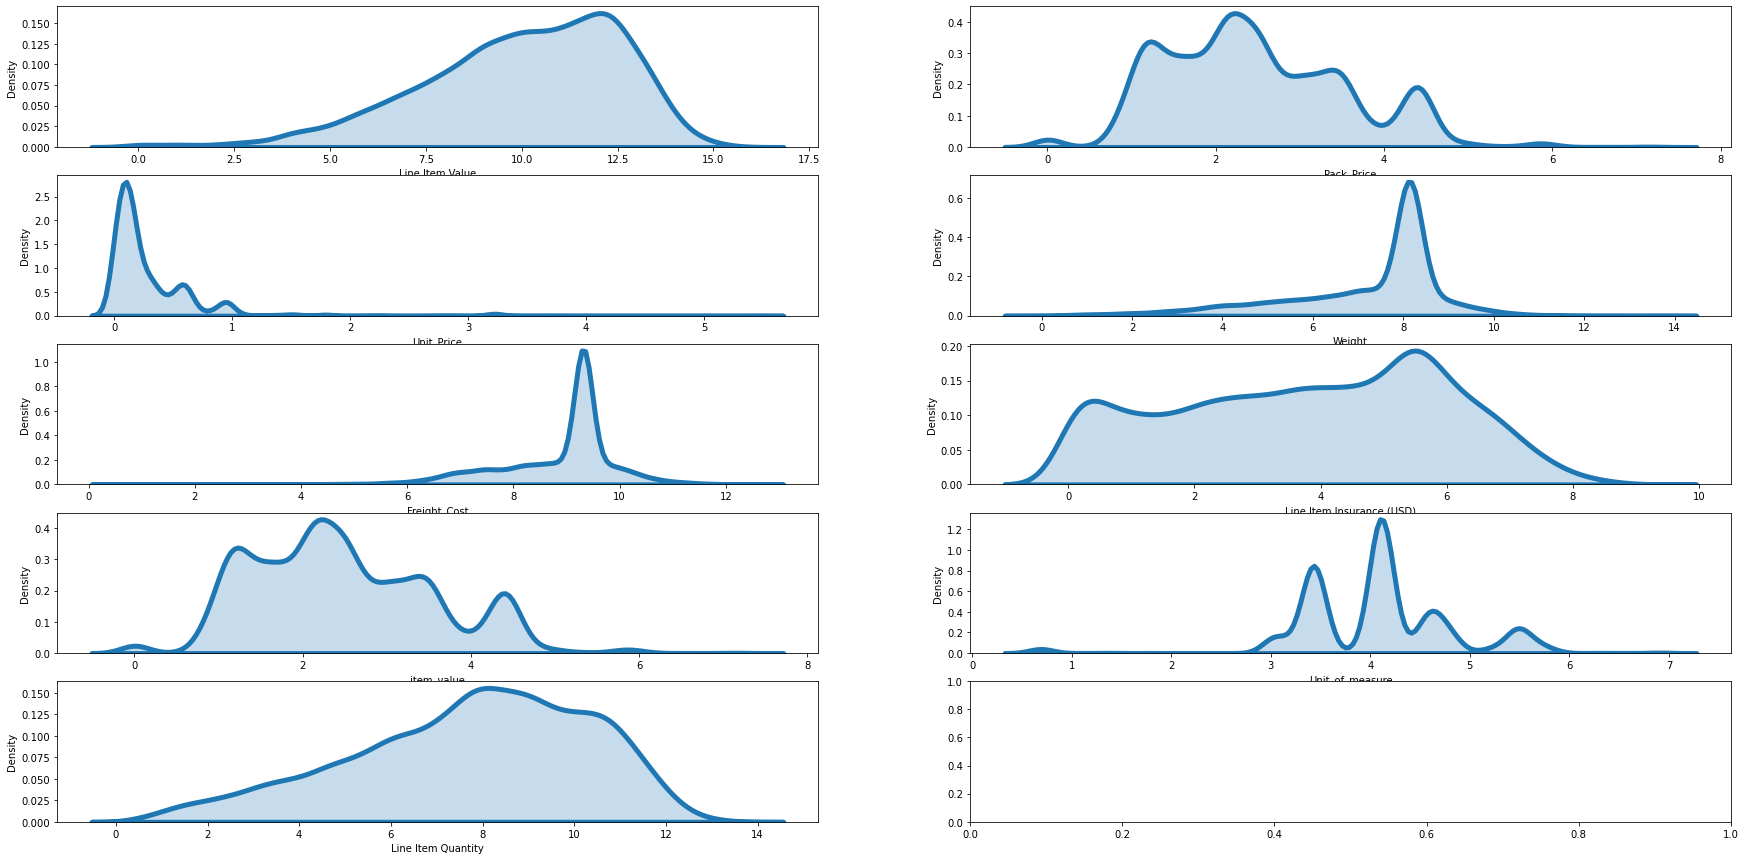

In [59]:
fig,ax=plt.subplots(5,2,figsize=(30,15))

row,column=0,0
for col in num_index:
    sns.kdeplot(trans[col],ax=ax[row,column],shade=True,linewidth=5)
    column+=1
    if column==2:
        column=0
        row+=1

## Outlier detection and Imputation

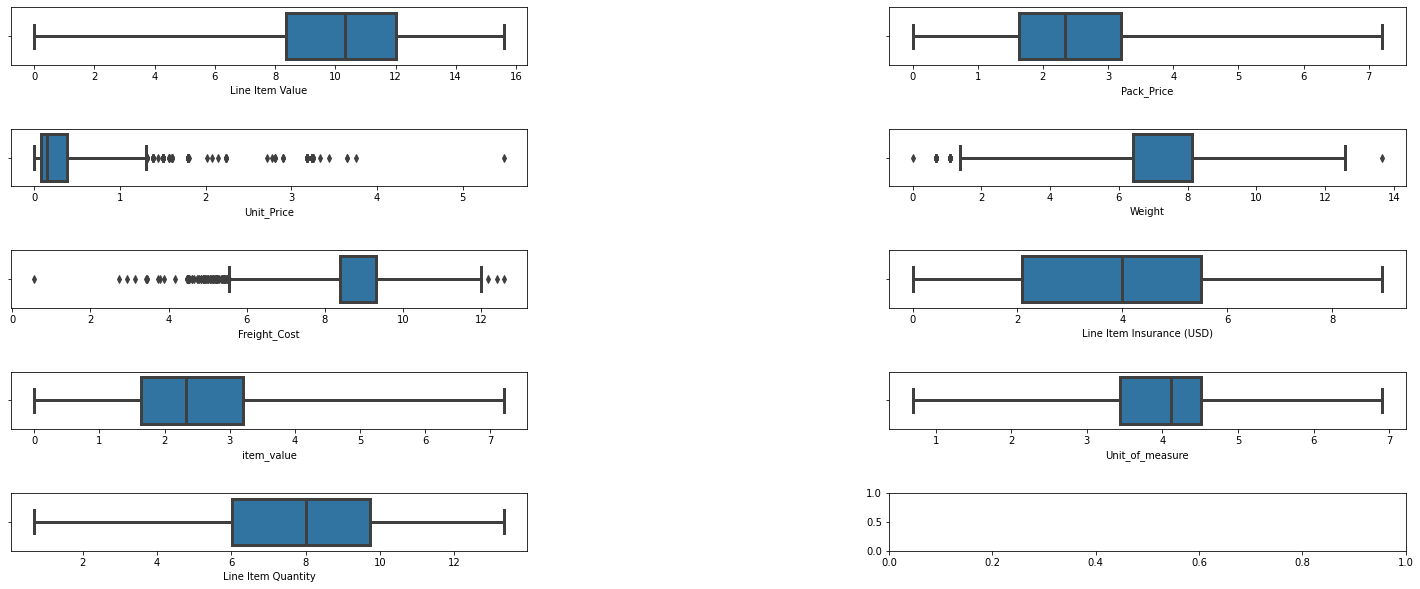

In [60]:
fig,ax=plt.subplots(5,2,figsize=(25,10),squeeze=False)
plt.subplots_adjust( 
                    wspace=0.7, 
                    hspace=1.1)
i,j=0,0
for col in num_index:
    sns.boxplot(x=data[col],ax=ax[i,j],whis=3,linewidth=3,)

    j+=1
    if j==2:
        j=0
        i+=1

**sometimes outliers can be informative as well as value to treat as outlier purely based on business usecase**

Unit of Measure(per pack)--although we see outliers here,they might not be actually outliers. Since , Packs can be filled with pills,test kits or a combo of both ;since both occupy spaces varyingly , this leads too excessive variability in data.So,we dont remove outliers here
                             

Freight Cost - This can excessively vary depending on the distance and route of shipment for the particular project.However ,we can't call them as outliers as they are
not rare and contain important information.Hence,we don't completely impute the outliers 

Similarly for all other columns,they definitely have some important information.Hence,we don't completely impute the outliers 
We manually impute those points as outliers,after which the data points become very sparse ; so that our model doesn't overfit 

In [61]:
#Outlier Imputation for Unit price
upper_limit = data["Unit_Price"].quantile(0.97)
data["Unit_Price"] = np.where(data["Unit_Price"] >= upper_limit,data["Unit_Price"].mean(),data["Unit_Price"])
data["Unit_Price"]

0        0.678034
1        0.029559
2        0.587787
3        0.067659
4        0.048790
           ...   
10319    0.058269
10320    0.104360
10321    0.285179
10322    0.104360
10323    0.029559
Name: Unit_Price, Length: 10324, dtype: float64

In [62]:
lower_limit = data["Freight_Cost"].quantile(0.02)
data["Freight_Cost"] = np.where(data["Freight_Cost"] <= lower_limit,data["Freight_Cost"].mean(),data["Freight_Cost"])
data["Freight_Cost"]

0         6.661010
1         8.416820
2         7.411423
3         9.680848
4        10.724392
           ...    
10319     9.315082
10320     9.315082
10321     9.315082
10322     9.315082
10323     9.315082
Name: Freight_Cost, Length: 10324, dtype: float64

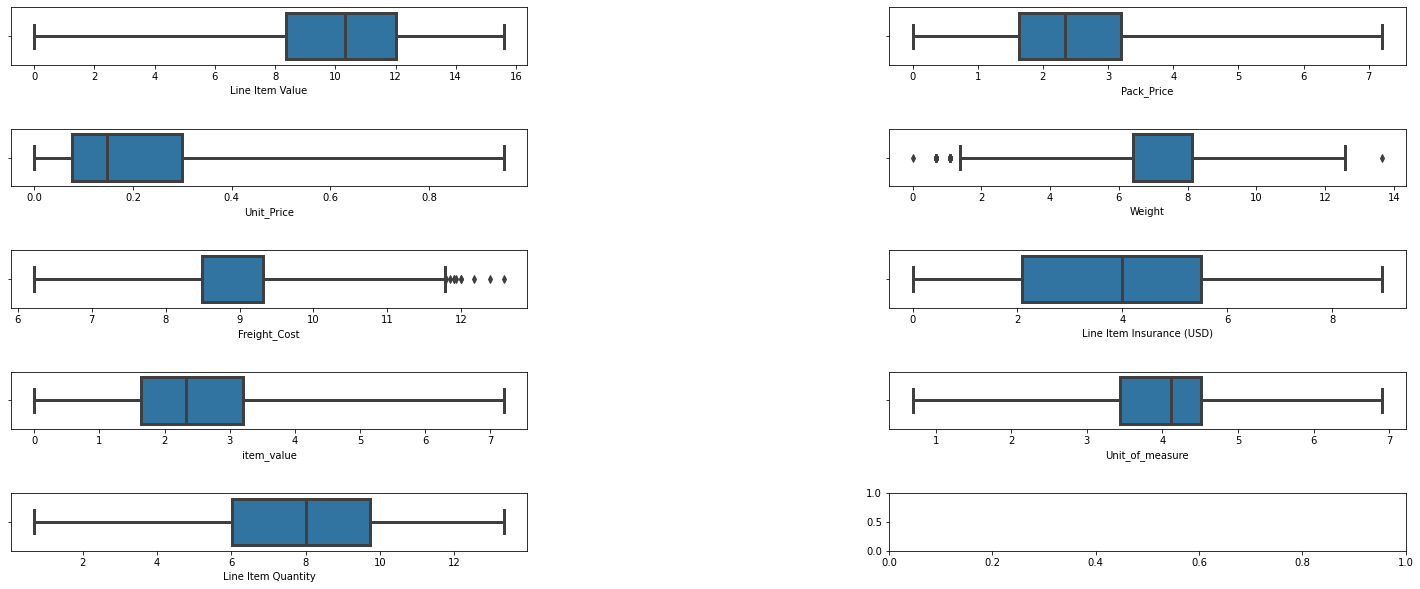

In [63]:
fig,ax=plt.subplots(5,2,figsize=(25,10),squeeze=False)
plt.subplots_adjust( 
                    wspace=0.7, 
                    hspace=1.1)
i,j=0,0
for col in num_index:
    sns.boxplot(x=data[col],ax=ax[i,j],whis=3,linewidth=3,)

    j+=1
    if j==2:
        j=0
        i+=1

## Feature Creation

New Features - important KPI's in logistics
As late delievery can cause additional charges because stuck of the shipment can be main reason for delay in delievery which largely affects cash flow and sure it will come with additional holding charges

In [64]:
# Delay in Delivery
data["dlvry_delay"]=data['Delivered to Client Date']-data['Scheduled Delivery Date'] 
# +ve days denotes Late delivery
#-ve sign denotes early delievery

# Delay in Delivery_verification_time
data["dlvry_verif_time_delay"]=data['Delivery Recorded Date']-data['Delivered to Client Date']


In [65]:
data[["dlvry_delay","dlvry_verif_time_delay"]].describe()

,dlvry_delay,dlvry_verif_time_delay
count,10324,10324
mean,-7 days +23:26:06.369624177,2 days 21:36:53.560635412
std,27 days 05:36:26.499569268,15 days 07:43:27.287344022
min,-372 days +00:00:00,-1 days +00:00:00
25%,-3 days +00:00:00,0 days 00:00:00
50%,0 days 00:00:00,0 days 00:00:00
75%,0 days 00:00:00,0 days 00:00:00
max,192 days 00:00:00,546 days 00:00:00


In [66]:
#As after converting datatype from timedelta to numeric values will get converted in the form of nano seconds
# to convert nano seconds in days
data["dlvry_delay"]=pd.to_numeric(data.dlvry_delay)/(60*60*24*(10**9))
data["dlvry_verif_time_delay"]=pd.to_numeric(data.dlvry_verif_time_delay)/(60*60*24*(10**9))

In [67]:
data[["dlvry_delay","dlvry_verif_time_delay"]].describe()

,dlvry_delay,dlvry_verif_time_delay
count,10324.000000,10324.000000
mean,-6.023537,2.900620
std,27.233640,15.321844
min,-372.000000,-1.000000
25%,-3.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,192.000000,546.000000


*As above we can see most of values of delievery delay are negative*
*As it is business understanding that early delievery doesn't play any role in holding cash flow only late delievery to be considered*

In [68]:
def no_negative(x):
    if x<0:
        x=0
    else:
        pass
    return x

In [69]:
data["dlvry_delay"]=data["dlvry_delay"].map(no_negative)
data["dlvry_verif_time_delay"]=data["dlvry_verif_time_delay"].map(no_negative)

In [70]:
print(data["dlvry_delay"].value_counts())
print(data["dlvry_verif_time_delay"].value_counts())

0.0      9138
1.0        92
4.0        63
7.0        62
5.0        61
         ... 
77.0        1
87.0        1
192.0       1
106.0       1
91.0        1
Name: dlvry_delay, Length: 97, dtype: int64
0.0      8416
1.0       219
5.0       154
2.0       149
3.0       102
         ... 
71.0        1
107.0       1
67.0        1
58.0        1
77.0        1
Name: dlvry_verif_time_delay, Length: 76, dtype: int64


As shown above 90% data from features "dlvry_delay","dlvry_verif_time_delay" contains 0.0 value which shows that this features are not useful for us as well other date columns from which this insights calculated also not contributing more in prediction

## Feature Selection

*As most of the columns give some mathematical relation in between them we will keep only calculated columns to reduce features* <br>
Line item value = line item quantity * pack price,
pack price = unit measure per pack * unit price
item_value"=(Line Item Value +Line Item Insurance (USD))/Line Item Quantity

We will drop **'Line Item Value','Unit_of_measure','Unit_Price'** features as there representation is already done by other columns

We will use Cramer's V for checking relation between categorical features
Cramér's V is a measure of association between two nominal variables, giving a value between 0 and +1. It is based on Pearson's chi-squared statistic

In [71]:
from dython.nominal import compute_associations
compute_associations(data[categ_index],nom_nom_assoc='cramer')


,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,First Line Designation,Weight_special,Freight_cost_special
Country,1.000000,-0.083507,0.152377,0.073553,-0.014966,0.276097,0.195122,0.097908,0.060664,0.032267,-0.106834,-0.186955,-0.094862,-0.391924,-0.129028,-0.223378,-0.237754
Vendor,-0.083507,1.000000,0.277092,0.467405,0.131625,0.381944,0.311811,0.182050,0.198016,0.068796,0.070944,0.936777,0.996851,-0.210335,-0.109952,0.052381,0.037507
Manufacturing Site,0.152377,0.277092,1.000000,0.602748,0.120742,0.390454,0.182611,0.325948,0.034088,0.188422,0.011554,0.241587,0.257610,-0.143489,-0.131710,-0.063551,-0.067679
Brand,0.073553,0.467405,0.602748,1.000000,0.205512,0.624387,0.454826,0.317695,0.305782,0.158764,0.021116,0.461169,0.464027,-0.285529,-0.154066,-0.037856,-0.046434
Item Description,-0.014966,0.131625,0.120742,0.205512,1.000000,-0.039537,0.282946,0.597851,0.418137,0.450636,0.033096,0.173298,0.120902,-0.072959,0.002142,0.066347,0.056716
Product Group,0.276097,0.381944,0.390454,0.624387,-0.039537,1.000000,0.659361,0.292756,0.325618,0.009945,-0.027703,0.214795,0.385591,-0.313787,-0.192577,-0.166676,-0.166382
Sub Classification,0.195122,0.311811,0.182611,0.454826,0.282946,0.659361,1.000000,0.088229,0.729043,0.175934,-0.008427,0.228551,0.317067,-0.254571,-0.120093,-0.066816,-0.073752
Molecule/Test Type,0.097908,0.182050,0.325948,0.317695,0.597851,0.292756,0.088229,1.000000,0.231016,0.439545,-0.016047,0.131582,0.168592,-0.117599,-0.078973,-0.041513,-0.042069
Dosage Form,0.060664,0.198016,0.034088,0.305782,0.418137,0.325618,0.729043,0.231016,1.000000,0.395770,0.008291,0.169000,0.205079,-0.158598,-0.015730,0.043339,0.034388
Dosage,0.032267,0.068796,0.188422,0.158764,0.450636,0.009945,0.175934,0.439545,0.395770,1.000000,-0.008798,0.090793,0.064262,-0.044773,-0.054979,-0.027331,-0.026088


<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

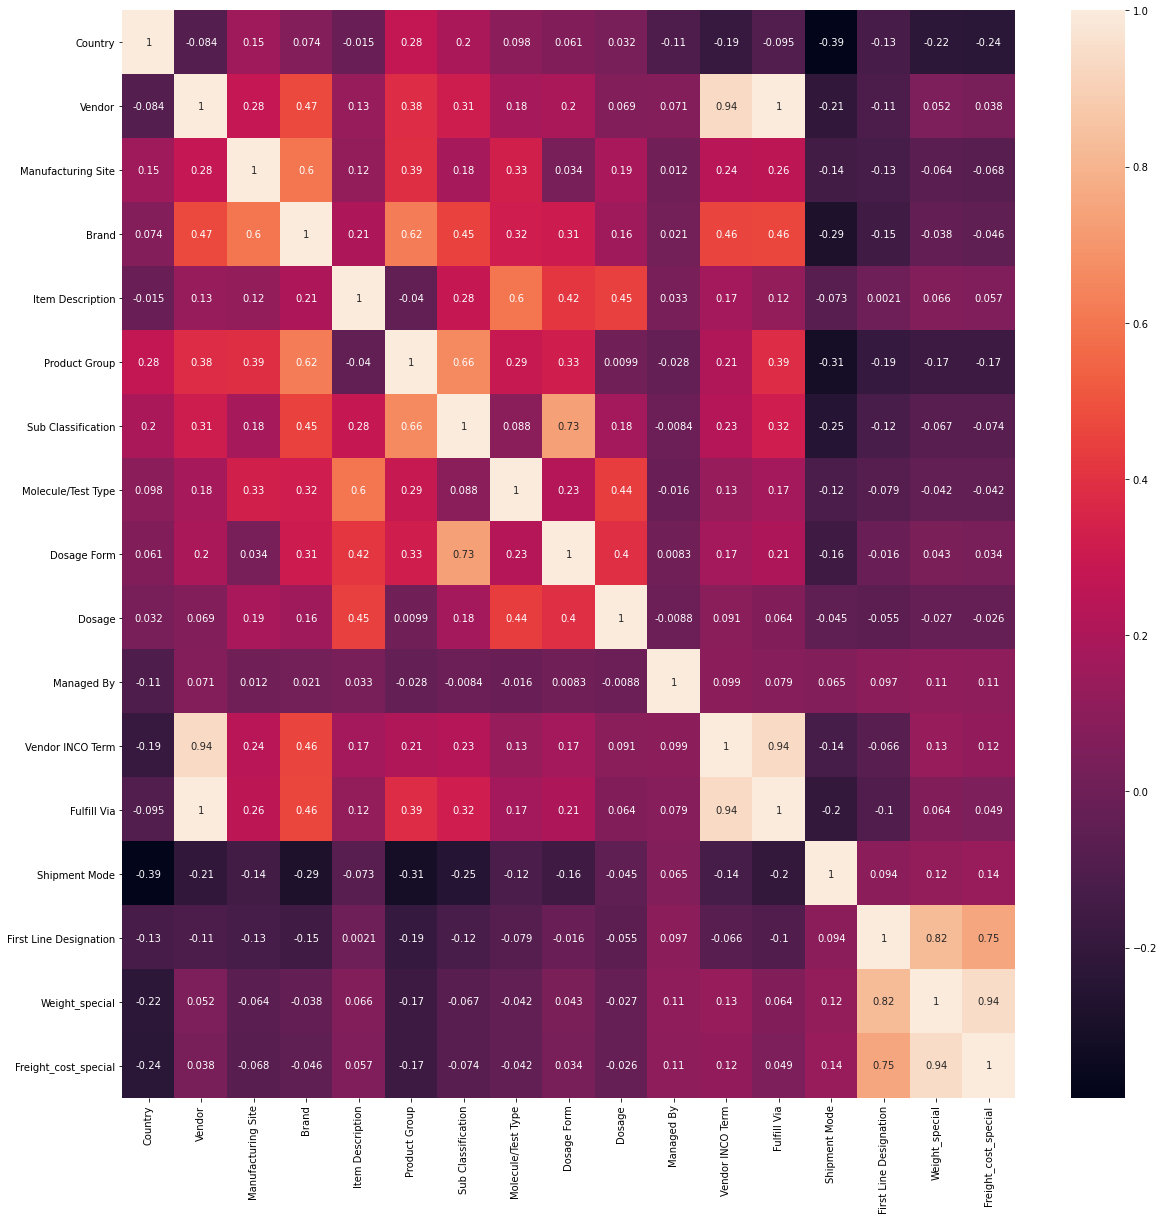

In [72]:
#Feature Removal
plt.figure(figsize=(10,10))
corr=compute_associations(data[categ_index])
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_features].corr(),annot=True)

In [73]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = compute_associations(data[categ_index])
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold and i!=j: # we are interested in absolute coeff value
                colname = corr_matrix.columns[j]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [74]:
correlation(data,0.9)

{'Vendor', 'Vendor INCO Term', 'Weight_special'}

*Removing the highly correlated columns - {'Vendor INCO Term', 'Vendor','Weight_special'}* <br>
*Removing  columns-{'Line Item Value','Unit_of_measure','Unit_Price'}*



In [75]:
# Rearranging data and deleting date columns

data=data[['Country', 'Manufacturing Site', 'Brand', 'Item Description',
       'Product Group', 'Sub Classification', 'Molecule/Test Type',
       'Dosage Form', 'Dosage', 'Managed By',
       'Fulfill Via', 'Shipment Mode',
      'Line Item Quantity',
       'Pack_Price','First Line Designation',
       'Weight', 'Freight_Cost',
       'Freight_cost_special', 'Line Item Insurance (USD)', 'item_value', 'Shipment_Price']]

data.head()

,Country,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Fulfill Via,Shipment Mode,Line Item Quantity,Pack_Price,First Line Designation,Weight,Freight_Cost,Freight_cost_special,Line Item Insurance (USD),item_value,Shipment_Price
0,1083,2,5,1,1728,1567,5,1575,2,10265,0.0,6327,2.995732,3.401197,1.0,2.639057,6.661010,6198,5.485285,3.752740,1571.457626
1,688,3172,7285,1,8550,1955,877,214,672,10265,0.0,6327,6.908755,1.974081,1.0,5.883322,8.416820,6198,5.485285,2.006887,10961.617626
2,1083,2,799,577,1728,1567,577,1575,1108,10265,0.0,6327,6.216606,4.394449,1.0,5.147494,7.411423,6198,5.485285,4.400360,41893.897626
3,688,2,7285,378,8550,6595,592,3532,526,10265,0.0,6327,10.371019,1.607436,1.0,7.526179,9.680848,6198,5.485285,1.608942,143607.977626
4,688,3172,7285,1,8550,6595,5,729,2,10265,0.0,6327,10.545368,1.435085,1.0,8.934719,10.724392,6198,5.485285,1.436588,167290.197626


In [76]:
data["Shipment_Price"]=data["Shipment_Price"].round(decimals=2)

In [77]:
data.to_csv("cleaned_shipment_data.csv")

# Model Selection

In [78]:
# Function to calculate ajusted r2 score
def adjusted_r2(r2,data):
    score=1-(1-r2)*(data.shape[0]-1)/(data.shape[0]-data.shape[1]-1)
    return score

In [79]:
from sklearn.model_selection import train_test_split
x=data.drop(columns=["Shipment_Price"])
y=data["Shipment_Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

**Regression models to try**<br>
Linear regression , lasso / regularised ,SVM regressor, KNN , rand forest regressor , XGB regressor


### Linear Regression

For trying linear regression model we will normalise our data

In [80]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()
data_norm = minmax.fit_transform(data)

In [81]:
data_norm_df = pd.DataFrame(data_norm,columns=data.columns)

In [82]:
x_norm=data_norm_df.drop(columns=["Shipment_Price"])
y_norm=data_norm_df["Shipment_Price"]
x_train_norm,x_test_norm,y_train_norm,y_test_norm = train_test_split(x_norm,y_norm,test_size=0.3,random_state=3)

In [83]:
from sklearn.model_selection import cross_val_score          
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
linreg=LinearRegression()
linreg.fit(x_train_norm,y_train_norm)

LinearRegression()

In [84]:
y_train_pred =linreg.predict(x_train_norm)
y_test_pred = linreg.predict(x_test_norm)

from sklearn.metrics import r2_score, mean_squared_error

print ("R-squared Training",r2_score(y_train_norm, y_train_pred))
print ("R-squared Testing",r2_score(y_test_norm, y_test_pred))
lin_adj_r2 =adjusted_r2(r2_score(y_test_norm, y_test_pred),x_test_norm)
print("Adjusted R2 for testing data",lin_adj_r2)

R-squared Training 0.43184058643768386
R-squared Testing 0.40800008685990874
Adjusted R2 for testing data 0.40415218362207916


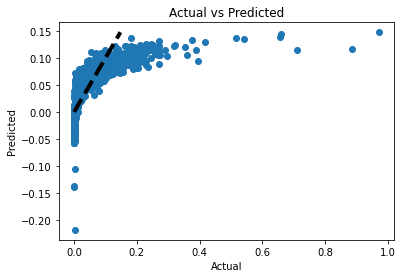

In [85]:
fig, ax = plt.subplots()

ax.scatter(y_test_norm, y_test_pred)
ax.plot([y_test_norm.min(), y_test_pred.max()], [y_test_norm.min(), y_test_pred.max()],'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

Our model is not performing well on linear regression.<br>
We will try Ridge regression

In [86]:
#Trying Out Ridge Regression as all features are useful

from sklearn.linear_model import RidgeCV ,Ridge

alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgeCV=RidgeCV(alphas=alphas,cv=10)
ridgeCV.fit(x_train_norm,y_train)

ridge_reg=Ridge(alpha=ridgeCV.alpha_)
ridge_reg.fit(x_train_norm,y_train_norm)

Ridge(alpha=0.06485760931392304)

In [87]:
y_train_pred =ridge_reg.predict(x_train_norm)
y_test_pred = ridge_reg.predict(x_test_norm)

from sklearn.metrics import r2_score, mean_squared_error

print ("R-squared Training",r2_score(y_train_norm, y_train_pred))
print ("R-squared Testing",r2_score(y_test_norm, y_test_pred))
Ridge_adj_r2 =adjusted_r2(r2_score(y_test_norm, y_test_pred),x_test_norm)
print("Adjusted R2 for testing data",Ridge_adj_r2)

R-squared Training 0.42613726520887063
R-squared Testing 0.4100525828765086
Adjusted R2 for testing data 0.4062180205292646


### Support Vector Regression

In [88]:
#Finding best parameters for Support Vector Regression
from sklearn.svm import LinearSVR,SVR
svm_grid = SVR()
parameters={
"kernel" : ['linear', 'poly', 'rbf', 'sigmoid']
}

In [89]:
# from sklearn.model_selection import GridSearchCV
# grid= GridSearchCV(svm_grid,param_grid=parameters,n_jobs=-1,cv=5,verbose=3)
# grid.fit(x_train_norm,y_train)
# grid.best_params_

In [90]:
#According to Gridsearch best parameter will be:
{'kernel': 'poly'}

{'kernel': 'poly'}

In [91]:
#Trying Out Support Vector Regression

from sklearn.svm import LinearSVR,SVR
   
svm_reg=SVR(kernel="poly")
svm_reg.fit(x_train,y_train)

SVR(kernel='poly')

In [92]:
y_train_pred =svm_reg.predict(x_train)
y_test_pred = svm_reg.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error

print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
svr_adj_r2 =adjusted_r2(r2_score(y_test, y_test_pred),x_test)
print("Adjusted R2 for testing data",svr_adj_r2)

R-squared Training -0.13693400068330885
R-squared Testing -0.1330390414801761
Adjusted R2 for testing data -0.14040361113555577


### Decision tree Regression

In [93]:
#Trying Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor , plot_tree

In [94]:
# Finding out best parameters for Decision Tree
parameters = {
 "criterion" : ["gini", "entropy"],
 "criterion":["mse", "mae"],
 "max_depth":range(2,40,1),
 "min_samples_leaf":range(1,10,1),
 "max_features" :[None,"auto", "sqrt", "log2",1],
 "max_leaf_nodes":[None,range(1,10,1)]
 }

In [95]:
# from sklearn.model_selection import GridSearchCV

# dt_grid = GridSearchCV(DecisionTreeRegressor(),param_grid=parameters,n_jobs=-1,cv=5,verbose=3)
# dt_grid.fit(x,y)
# dt_grid.best_params_

In [96]:
#According to gridsearch cv following are the best_params_
{'criterion': 'mse',
 'max_depth': 8,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

{'criterion': 'mse',
 'max_depth': 8,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [97]:
dtree_reg=DecisionTreeRegressor(criterion= 'mse',
 max_depth= 8,
 max_leaf_nodes= 40,
 min_samples_leaf= 10,
 min_samples_split= 10)
dtree_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=40, min_samples_leaf=10,
                      min_samples_split=10)

In [98]:
y_train_pred =dtree_reg.predict(x_train)
y_test_pred = dtree_reg.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error

print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
dt_adj_r2 =adjusted_r2(r2_score(y_test, y_test_pred),x_test)
print("Adjusted R2 for testing data",dt_adj_r2)

R-squared Training 0.9619746392106253
R-squared Testing 0.9500523782293997
Adjusted R2 for testing data 0.9497277268041764


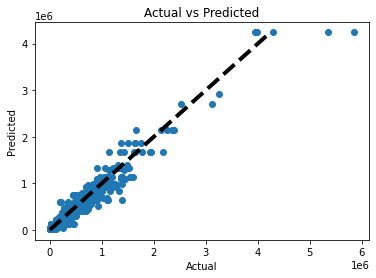

In [99]:
fig, ax = plt.subplots()

ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()],'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

### Random Forest Regression

In [100]:
# # Finding best parameters for Random Forest Regressor
# from sklearn.ensemble import RandomForestRegressor

# rand_grid = RandomForestRegressor()

# parameters = {
# "criterion" : ["gini", "entropy"],
# "criterion":["mse", "mae"],
# "n_estimators":[10,20,30,40],
# "max_depth":range(2,40,1),
# "min_samples_leaf":range(1,10,1),
# "max_features" :[None,"auto", "sqrt", "log2",1],
# "max_leaf_nodes":[None,range(1,10,1)]
# }

# grid= GridSearchCV(rand_grid,param_grid=parameters,n_jobs=-1,cv=5,verbose=3)
# grid.fit(x,y)
# grid.best_params_

In [101]:
#According to Gridsearch best parameter will be:
{"min_samples_leaf":10,"n_estimators":30}

{'min_samples_leaf': 10, 'n_estimators': 30}

In [102]:
#Trying Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


rand_forest=RandomForestRegressor(min_samples_leaf=10,n_estimators=30,n_jobs=-1)
rand_forest.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=10, n_estimators=30, n_jobs=-1)

In [103]:
y_train_pred =rand_forest.predict(x_train)
y_test_pred = rand_forest.predict(x_test)

print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
rand_adj_r2 =adjusted_r2(r2_score(y_test, y_test_pred),x_test)
print("Adjusted R2 for testing data",rand_adj_r2)

R-squared Training 0.9678836574524726
R-squared Testing 0.9502493331553795
Adjusted R2 for testing data 0.9499259619051708


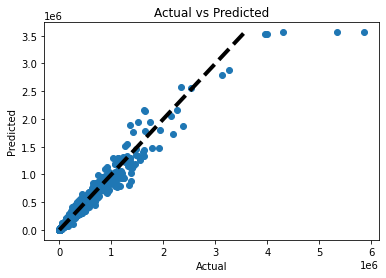

In [104]:
fig, ax = plt.subplots()

ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()],'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

### XGB Regression

In [105]:
# #Finding best parameters for XGB Regressor
# from sklearn.ensemble import XGBRegressor

# xgb_grid =XGBRegressor()

# parameters ={
#         'min_child_weight':[1,5,10],
#         'gamma':[0.5,1,1.5,2,5],
#         'subsample':[0.6,0.7,0.8,0.9,1.0],
#         'colsample_bytree':[0.6,0.8,1.0],
#         'max_depth':[3,4,8,9],
#         "eta":[0.1,0.2,0.3]
#         }


# grid= GridSearchCV(xgb_grid,param_grid=parameters,n_jobs=-1,cv=5,verbose=3)
# grid.fit(x,y)
# grid.best_params_

In [106]:
#According to Gridsearch best parameter will be:
{"subsample":0.7,"max_depth":9,"colsample_bytree":0.8,"eta":0.1}

{'subsample': 0.7, 'max_depth': 9, 'colsample_bytree': 0.8, 'eta': 0.1}

In [107]:
#Trying XGBoost Regressor

from xgboost import XGBRegressor 

xgb_reg=XGBRegressor(subsample=0.7,max_depth=9,colsample_bytree=0.8,eta=0.1)
xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
y_train_pred =xgb_reg.predict(x_train)
y_test_pred = xgb_reg.predict(x_test)

print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
xgbr_adj_r2 =adjusted_r2(r2_score(y_test, y_test_pred),x_test)
print("Adjusted R2 for testing data",xgbr_adj_r2)

R-squared Training 0.999640993902696
R-squared Testing 0.991406195519809
Adjusted R2 for testing data 0.991350337187146


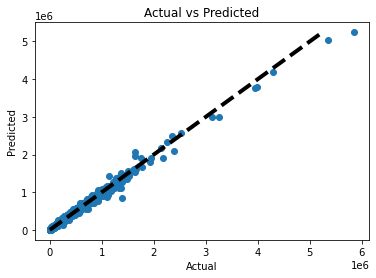

In [109]:
fig, ax = plt.subplots()

ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()],'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

### KNN Regression

In [110]:
#Trying KNN Regression
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [111]:
y_train_pred =knn.predict(x_train)
y_test_pred = knn.predict(x_test)

print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
knn_adj_r2 =adjusted_r2(r2_score(y_test, y_test_pred),x_test)
print("Adjusted R2 for testing data",knn_adj_r2)

R-squared Training 0.5334091389292137
R-squared Testing 0.4473864480984374
Adjusted R2 for testing data 0.4437945498085345


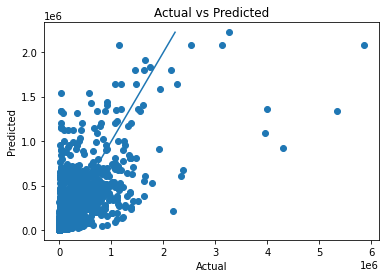

In [112]:
fig, ax = plt.subplots()

ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()])
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

### Finding out model with Highest R2 score

In [113]:
adj_r2 = [lin_adj_r2,Ridge_adj_r2,svr_adj_r2,dt_adj_r2,rand_adj_r2,xgbr_adj_r2,knn_adj_r2]
adj_r2

[0.40415218362207916,
 0.4062180205292646,
 -0.14040361113555577,
 0.9497277268041764,
 0.9499259619051708,
 0.991350337187146,
 0.4437945498085345]

In [114]:
score_matrix = pd.DataFrame(adj_r2,index=["Linear_Regression","Ridge_Regression","Support Vector Regression","Decision tree Regression","Random Forest Regression","XGB Regression","KNN Regression"],columns=["Adjusted_r2_score"])
score_matrix

,Adjusted_r2_score
Linear_Regression,0.404152
Ridge_Regression,0.406218
Support Vector Regression,-0.140404
Decision tree Regression,0.949728
Random Forest Regression,0.949926
XGB Regression,0.991350
KNN Regression,0.443795


In [115]:
# So, Best model is XGB Regression
xgb_reg=XGBRegressor(subsample=0.7,max_depth=9,colsample_bytree=0.8,eta=0.1)
cv_score= cross_val_score(xgb_reg,x,y,cv=10)
cv_score


array([0.96200103, 0.96939942, 0.99245968, 0.99010656, 0.99156563,
       0.98953801, 0.9931098 , 0.98475296, 0.99334879, 0.98614132])

In [116]:
cv_score.mean()

0.9852423210632807

In [121]:
xgb_reg=XGBRegressor(subsample=0.7,max_depth=9,colsample_bytree=0.8,eta=0.1)
xgb_reg.fit(x_train,y_train)

import pickle
filename="xgboost_final.pickle"
pickle.dump(xgb_reg,open(filename,'wb'))



In [122]:
model=pickle.load(open(filename,'rb'))
pred=model.predict(x_test)
r2_score(y_test,pred)

0.991406195519809

In [119]:
#dill.dump_session('new.db')

In [124]:
len(x_test.columns)

20